# Group 2 - Python Notebook

In [1]:
from Dataset import Preprocessing
from Model.mnb import MultinomialNaiveBayes
from Utils.utils import *

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### Import data

In [2]:

data_processing = Preprocessing()
reviews_df, wines_df, users_df, full_df = data_processing.get_dataset()

Reading data...
Creating labels...
Balancing data, downsampling.. 
Cleaning data...
Tokenizing data...


C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:23: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.full_df = pd.read_csv(path + "\\full_dataset.csv")
C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350501 entries, 1068114 to 756463
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1350501 non-null  object 
 1   Year         1316951 non-null  object 
 2   Wine ID      1350501 non-null  int64  
 3   User Rating  1350501 non-null  float64
 4   Note         1350491 non-null  object 
 5   CreatedAt    1350501 non-null  object 
 6   User         1350491 non-null  object 
 7   Winery       1350501 non-null  object 
 8   Rating       1350501 non-null  float64
 9   Country      1350501 non-null  object 
 10  Region       1349489 non-null  object 
 11  Price        1350501 non-null  float64
 12  Sentiment    1350501 non-null  int64  
 13  Cleaned      1350501 non-null  object 
 14  Tokenized    1350501 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 164.9+ MB


In [4]:
reviews_df.info(), wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630246 entries, 0 to 1630245
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Wine         1630246 non-null  object 
 1   Year         1589277 non-null  object 
 2   Wine ID      1630246 non-null  int64  
 3   User Rating  1630246 non-null  float64
 4   Note         1630236 non-null  object 
 5   CreatedAt    1630246 non-null  object 
 6   User         1630236 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 87.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1798 non-null   object 
 1   Year        1794 non-null   object 
 2   Wine ID     1798 non-null   int64  
 3   Wine        1798 non-null   object 
 4   Rating      1798 non-null   float64
 5   num_review  1798 non-null   int

(None, None)

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49297 entries, 0 to 49296
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         49297 non-null  object
 1   Bio          8886 non-null   object
 2   UserCountry  49297 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


### Data Visualization

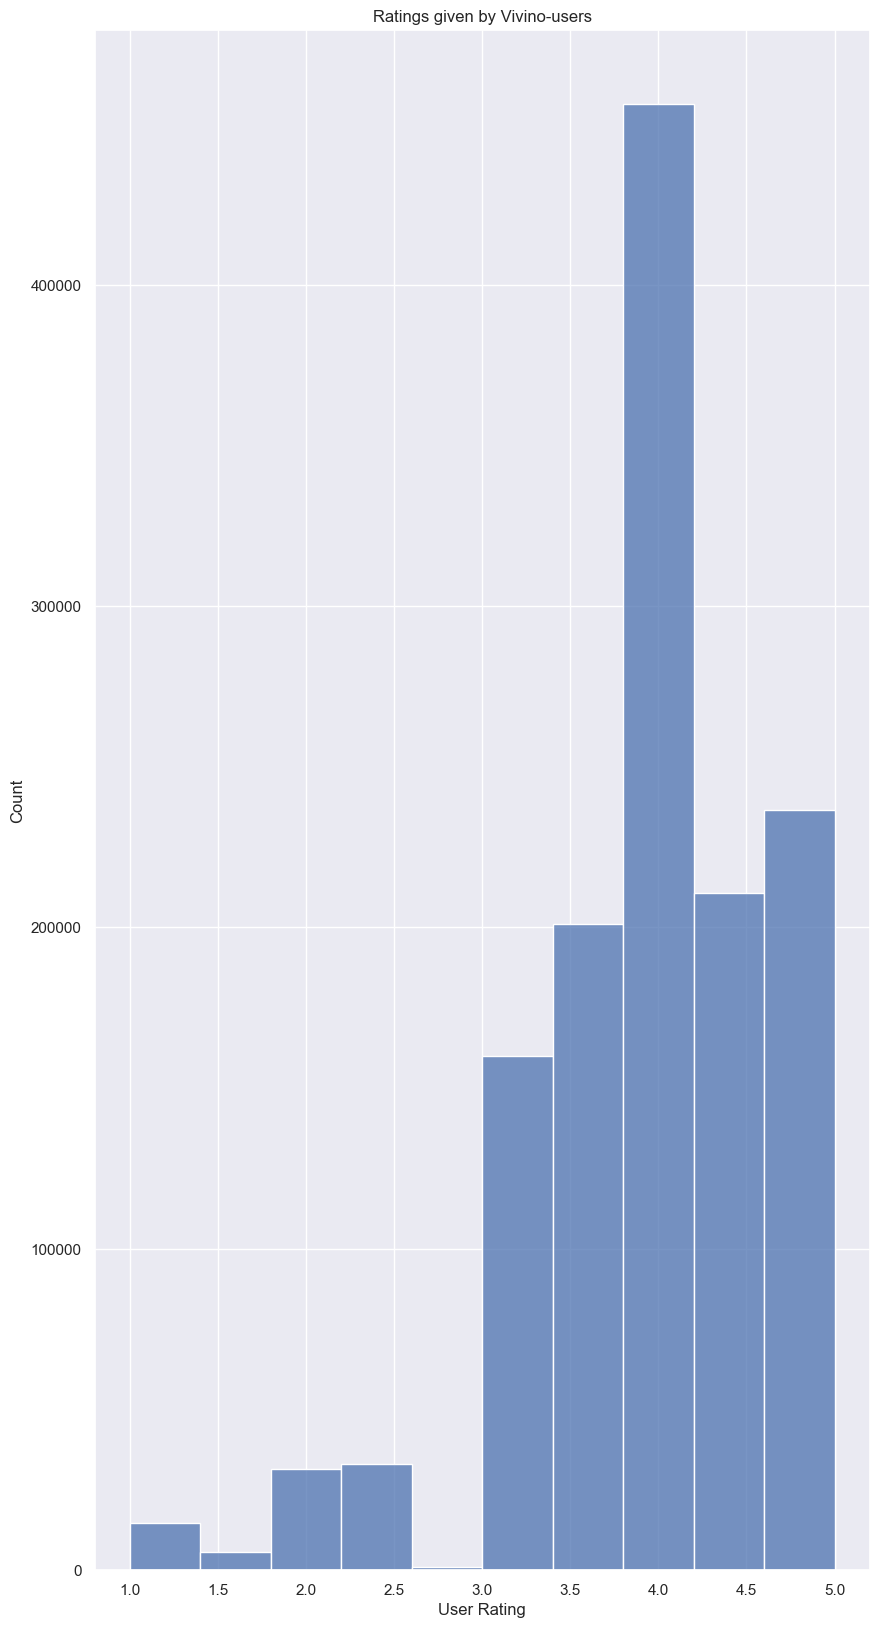

In [54]:
sns.histplot(full_df["User Rating"], bins=10, kde=False).set(title='Ratings given by Vivino-users')
sns.set(rc={'figure.figsize':(100,5)})

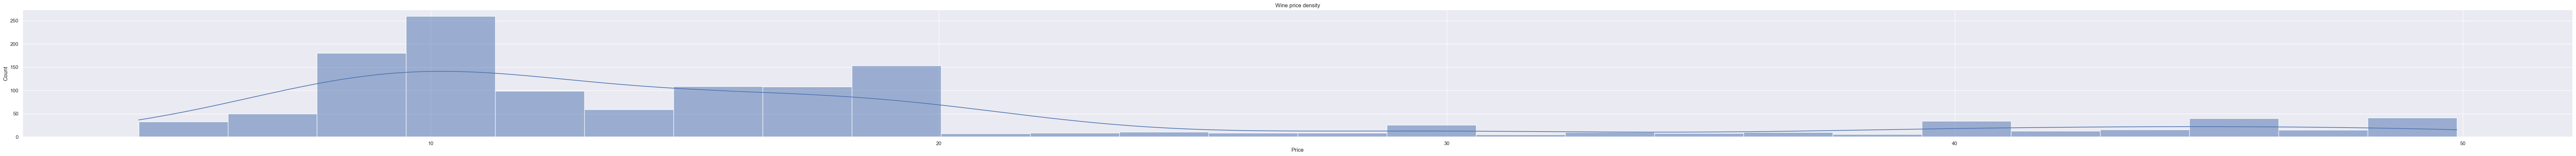

In [55]:
df = wines_df[wines_df.Price<50].sort_values('Price')
bins =  np.arange(0, 50.0, 2)
#plt.hist(df['Price'], bins)
sns.histplot(data=df['Price'], kde=True).set(title='Wine price density')
sns.set(rc={'figure.figsize':(10,20)})

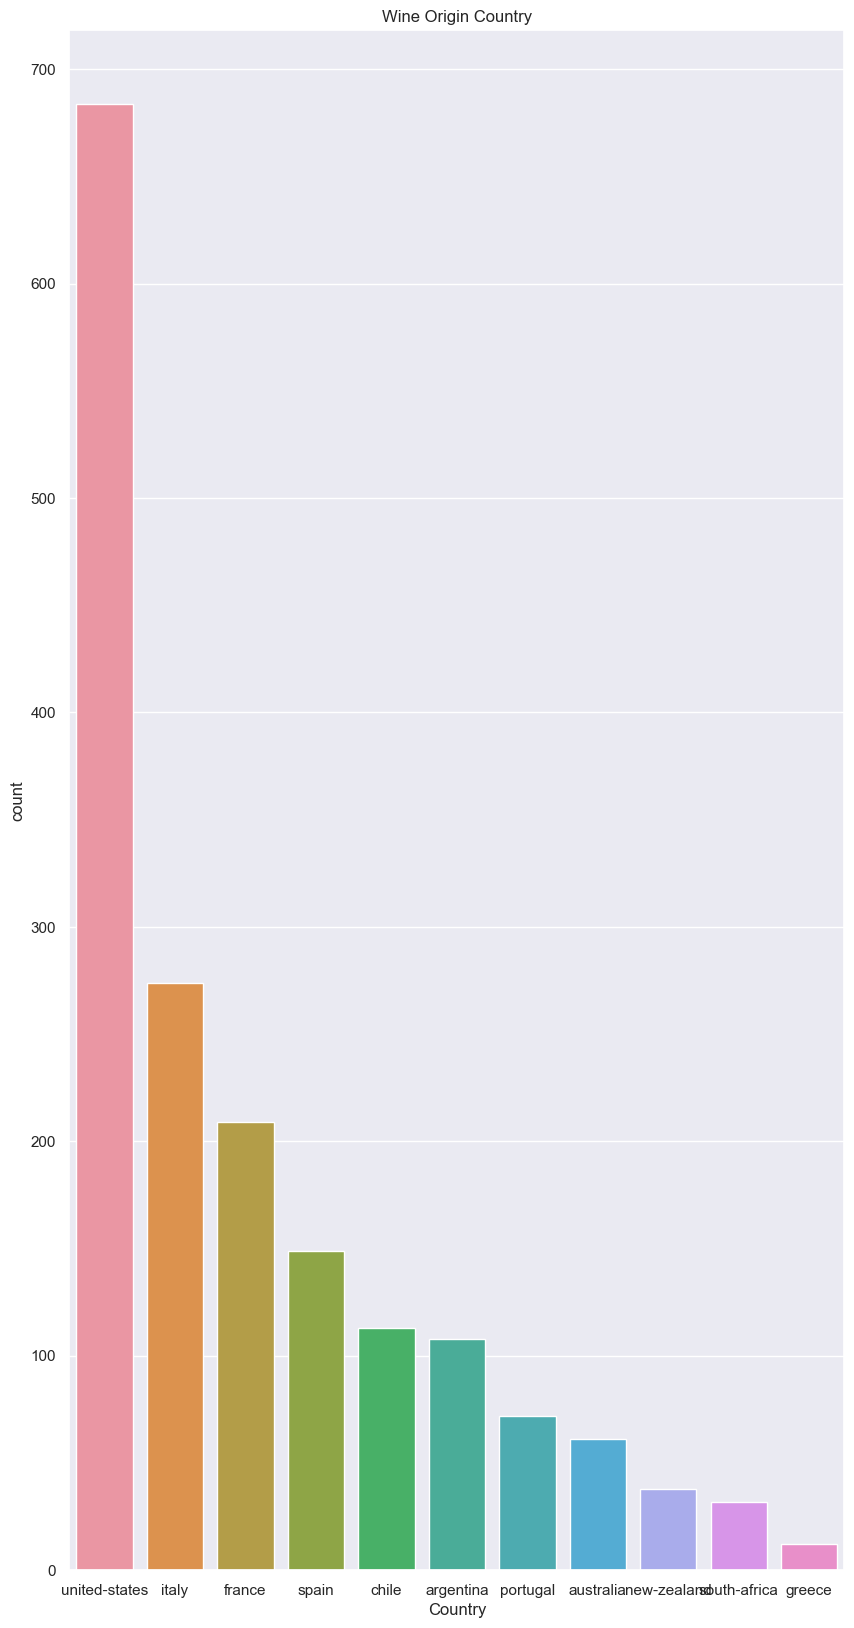

In [56]:
sns.countplot(x = wines_df["Country"], order = wines_df["Country"].value_counts().iloc[:11].index).set(title='Wine Origin Country')
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

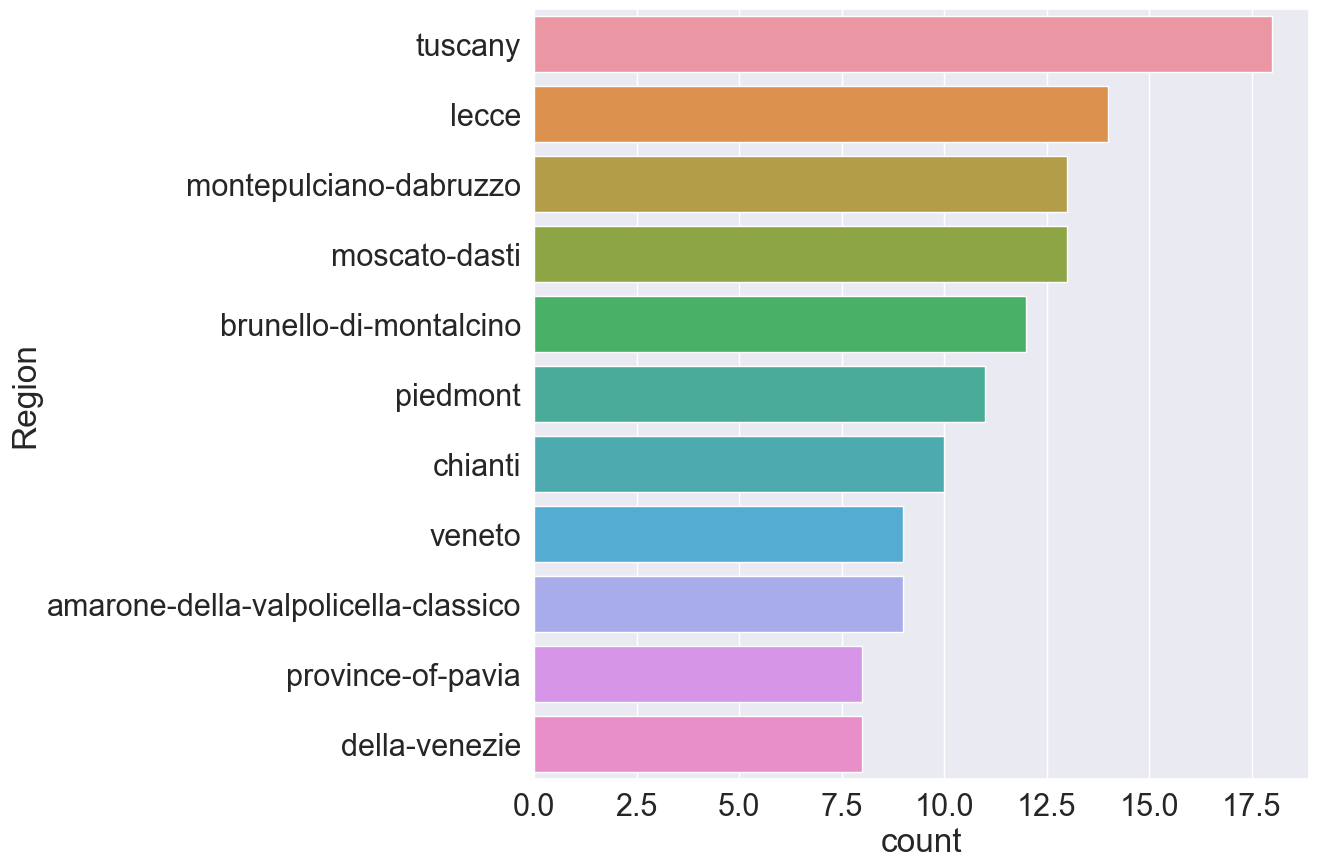

In [57]:
sns.countplot(y = wines_df[wines_df['Country']=='italy']["Region"], order = wines_df[wines_df['Country']=='italy']["Region"].value_counts().iloc[:11].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 2)

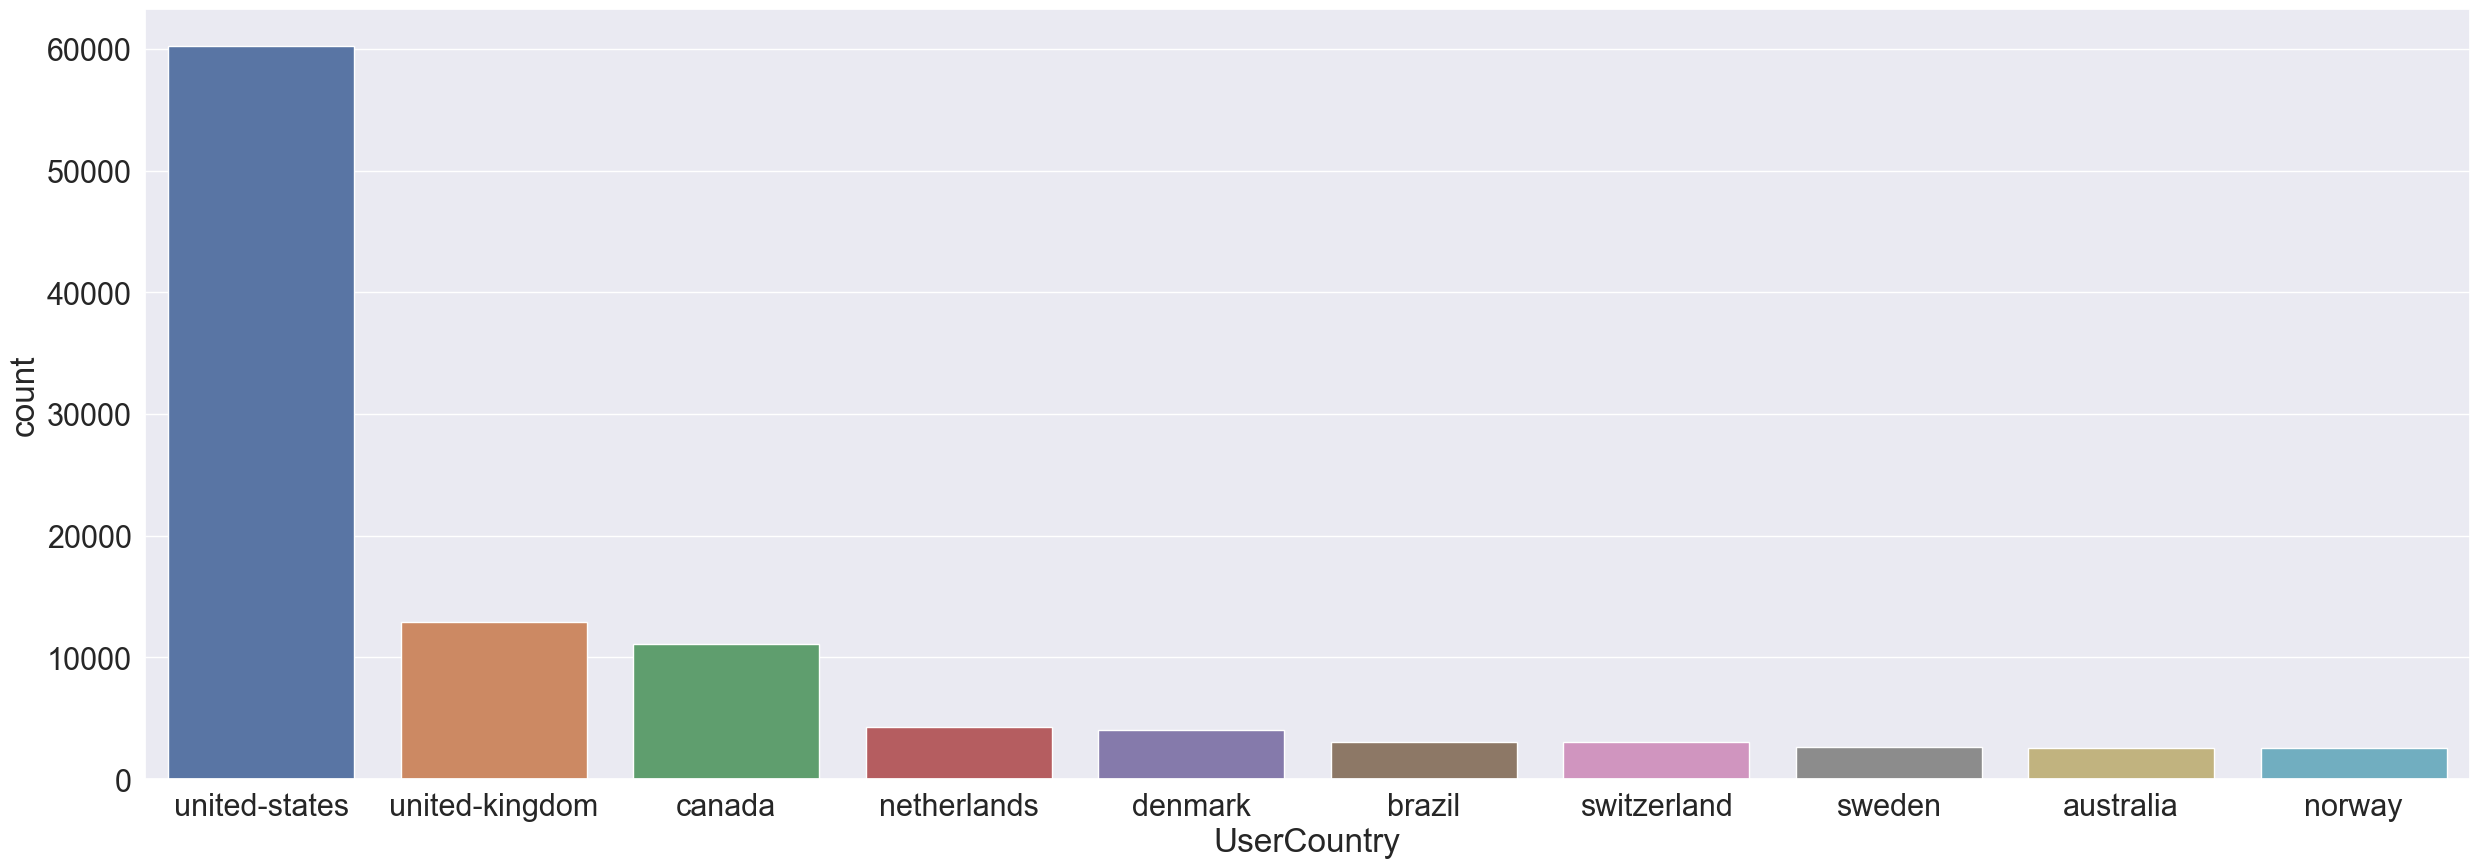

In [58]:
df_users = full_df.merge(users_df,on="User",how='outer')
df_users = df_users[df_users['UserCountry'].notna()]
sns.countplot(x = df_users["UserCountry"], order = df_users["UserCountry"].value_counts().iloc[:10].index)
sns.set(rc={'figure.figsize':(30, 15)}, font_scale = 2)

<AxesSubplot: xlabel='Price', ylabel='count'>

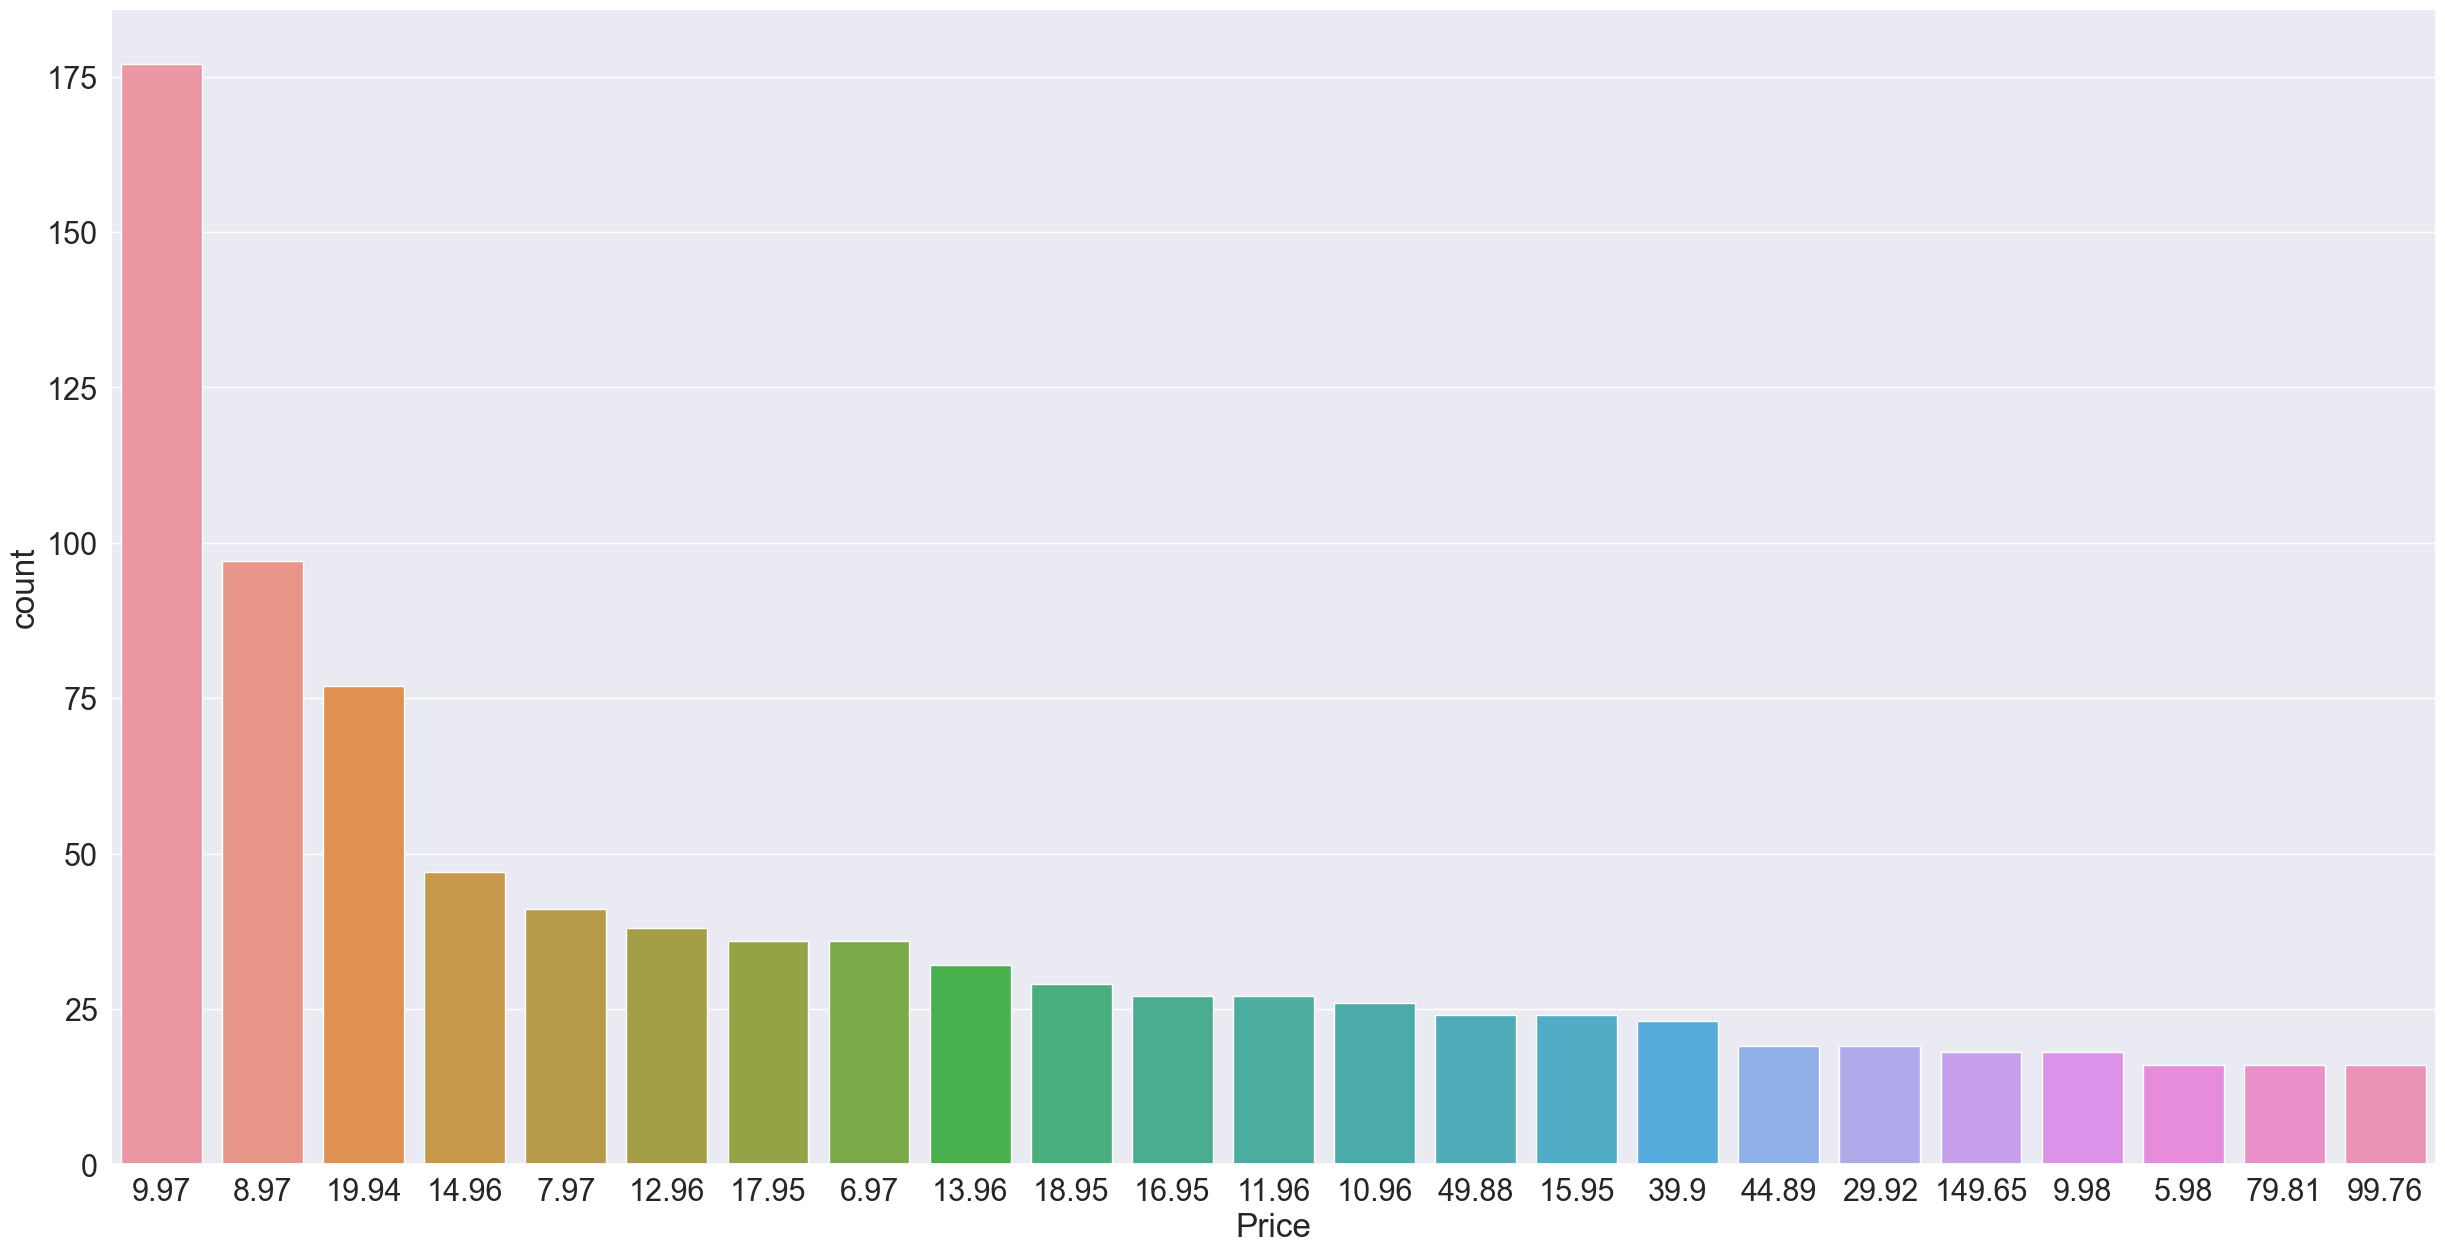

In [59]:
df_price = round(wines_df["Price"],2)
sns.countplot(x = df_price, order = df_price.value_counts().iloc[:23].index)

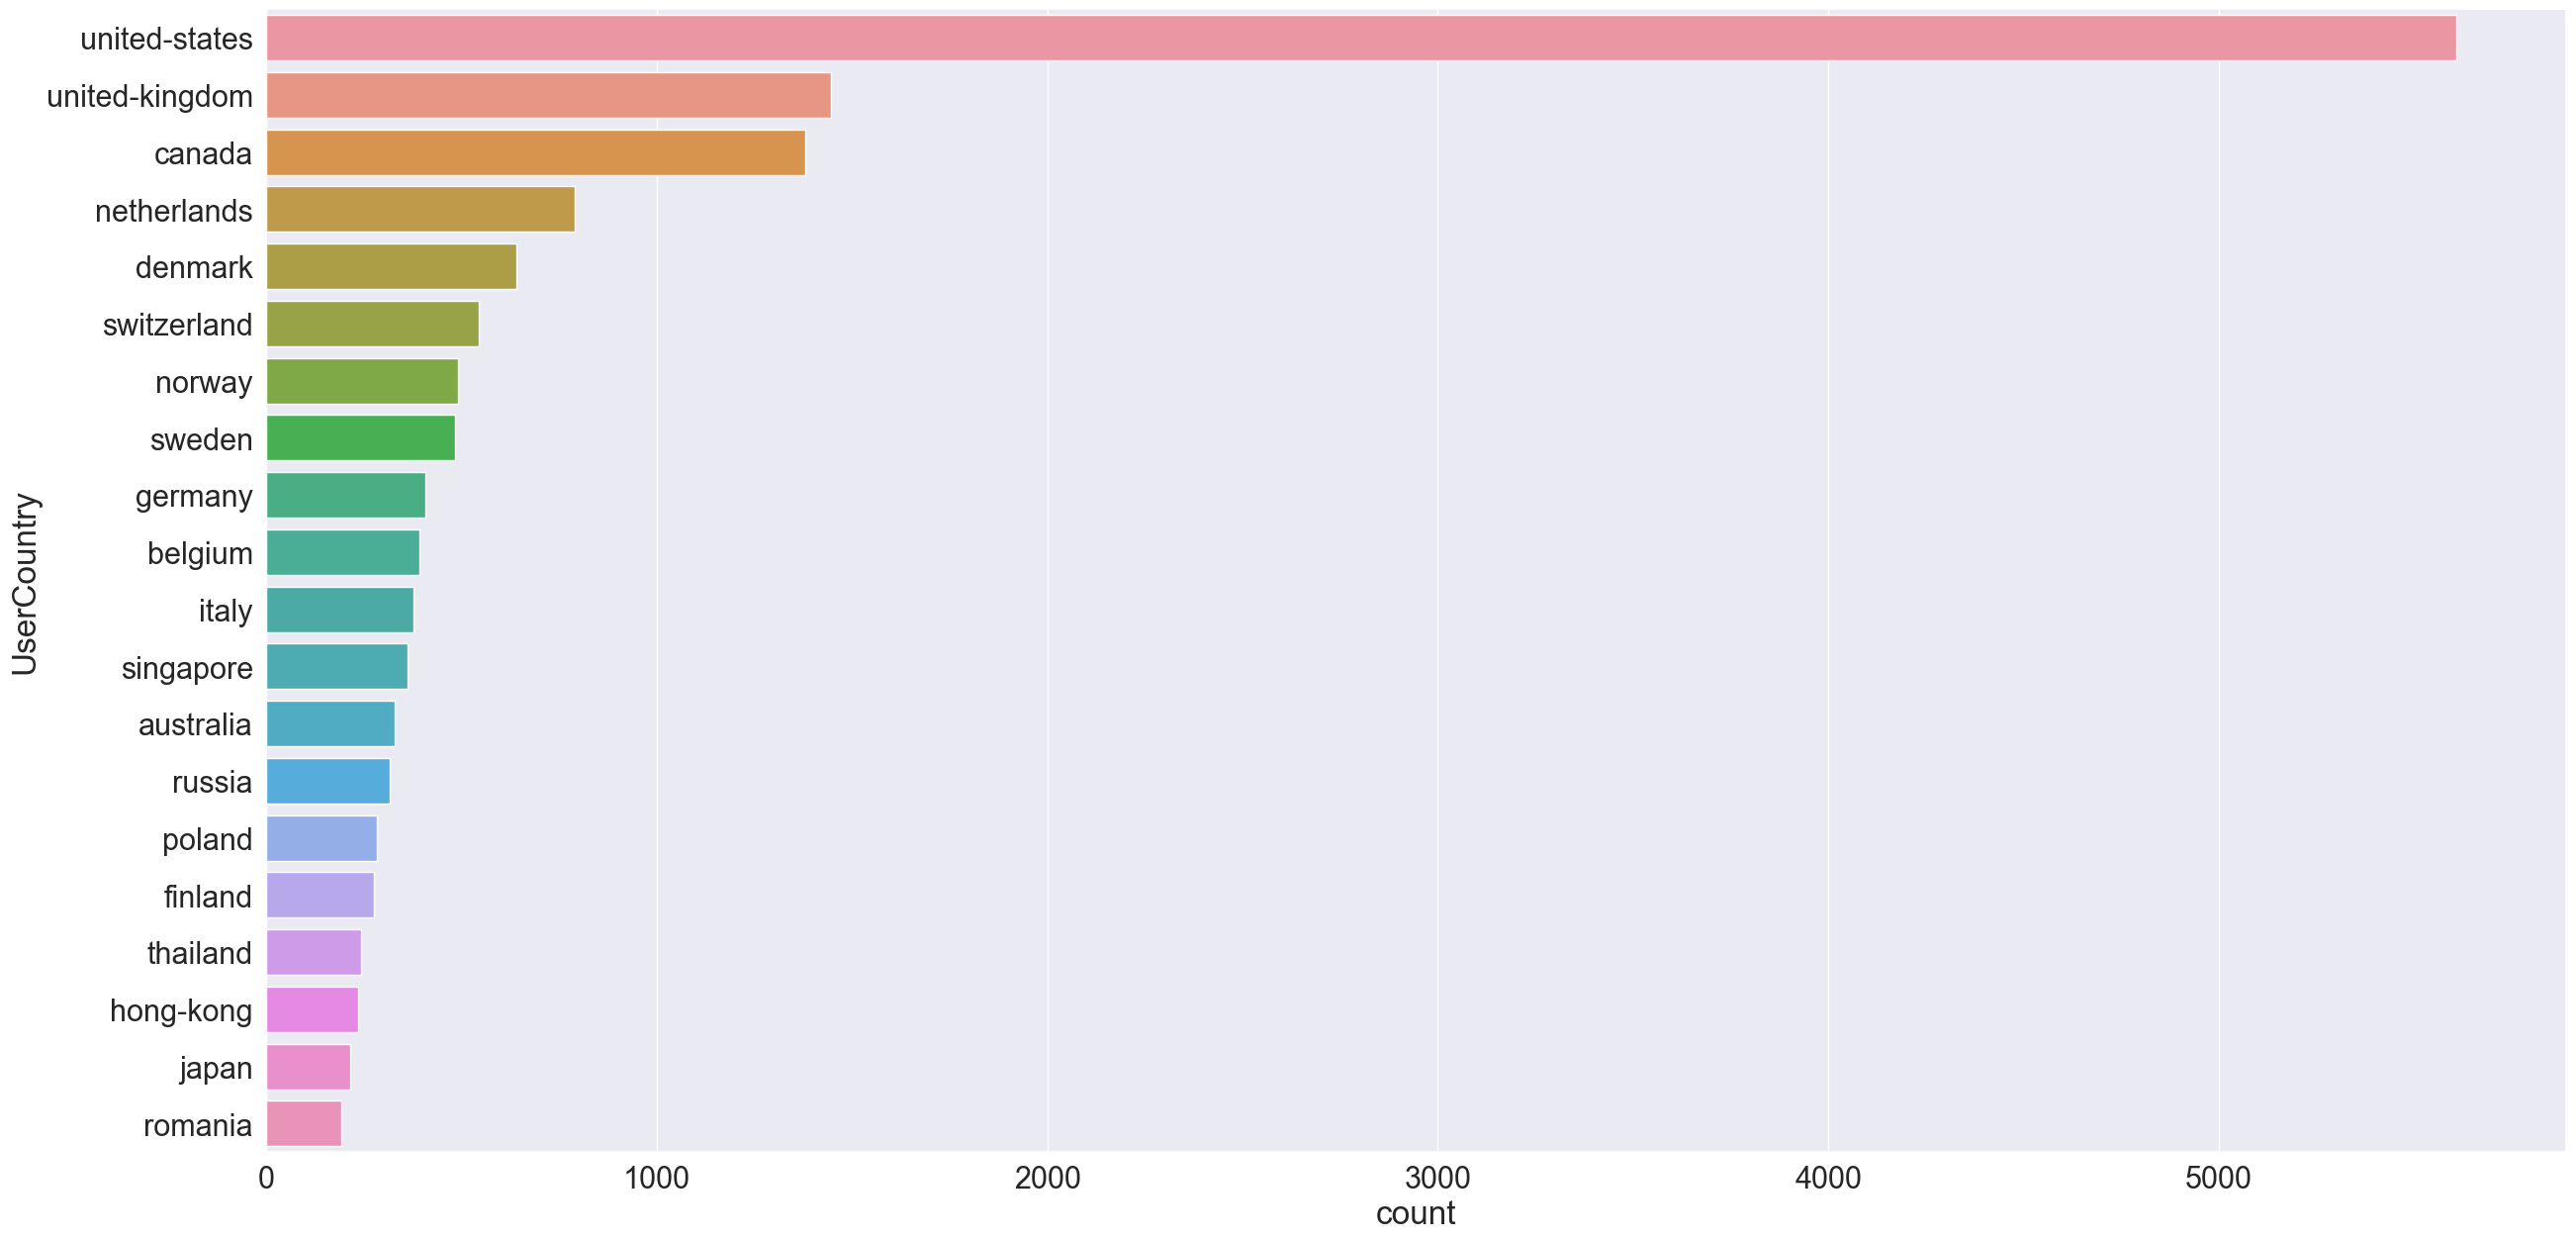

In [60]:
sns.countplot(y = df_users[df_users['Country']=='italy']['UserCountry'], order = df_users[df_users['Country']=='italy']['UserCountry'].value_counts().iloc[:20].index)
sns.set(rc={'figure.figsize':(30, 10)}, font_scale = 3)

#### Wordcloud Cleaned Reviews

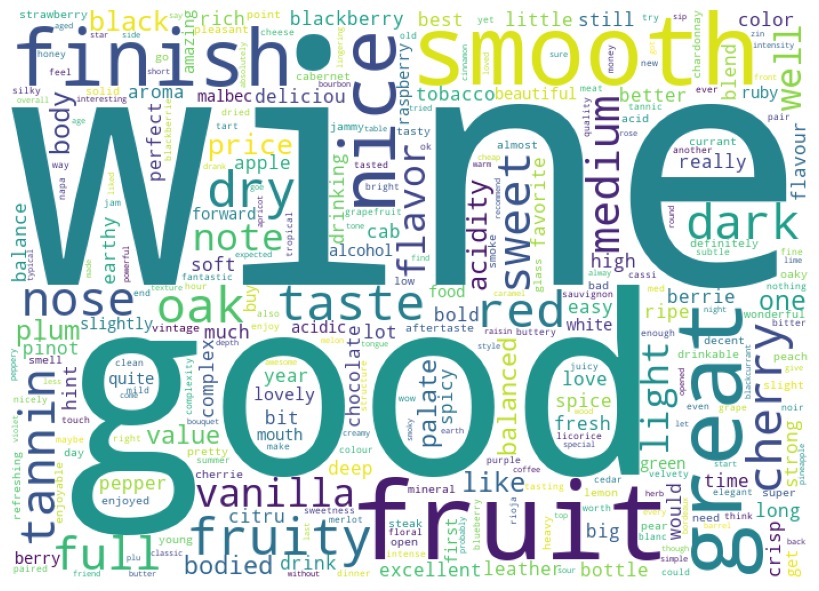

In [61]:
plot_wordcloud(full_df["Cleaned"])

-----
### Multinomial Naive Bayes
##### Train - test split (70 - 30 %)

In [62]:
from sklearn.model_selection import train_test_split

X, y  = full_df, full_df['Sentiment']
_X_train, _X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
X_train = _X_train['Tokenized']
X_test = _X_test['Tokenized']

##### MNB Training

In [63]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(np.array([-1,0,1]))
).fit(X_train.values, y_train.values)

##### Prediction on Test set

In [64]:
y_hat = MNB.predict(X_test.values)

#### Evaluation

In [65]:
acc = np.sum(np.equal(y_test.values, y_hat)) / len(y_test)
print("Accuracy: ", acc)

Accuracy:  0.5614770789162559


In [66]:
class_report(y_test,y_hat)

              precision    recall  f1-score   support

          -1       0.62      0.64      0.63    135050
           0       0.46      0.39      0.42    135050
           1       0.58      0.66      0.62    135051

    accuracy                           0.56    405151
   macro avg       0.55      0.56      0.56    405151
weighted avg       0.55      0.56      0.56    405151



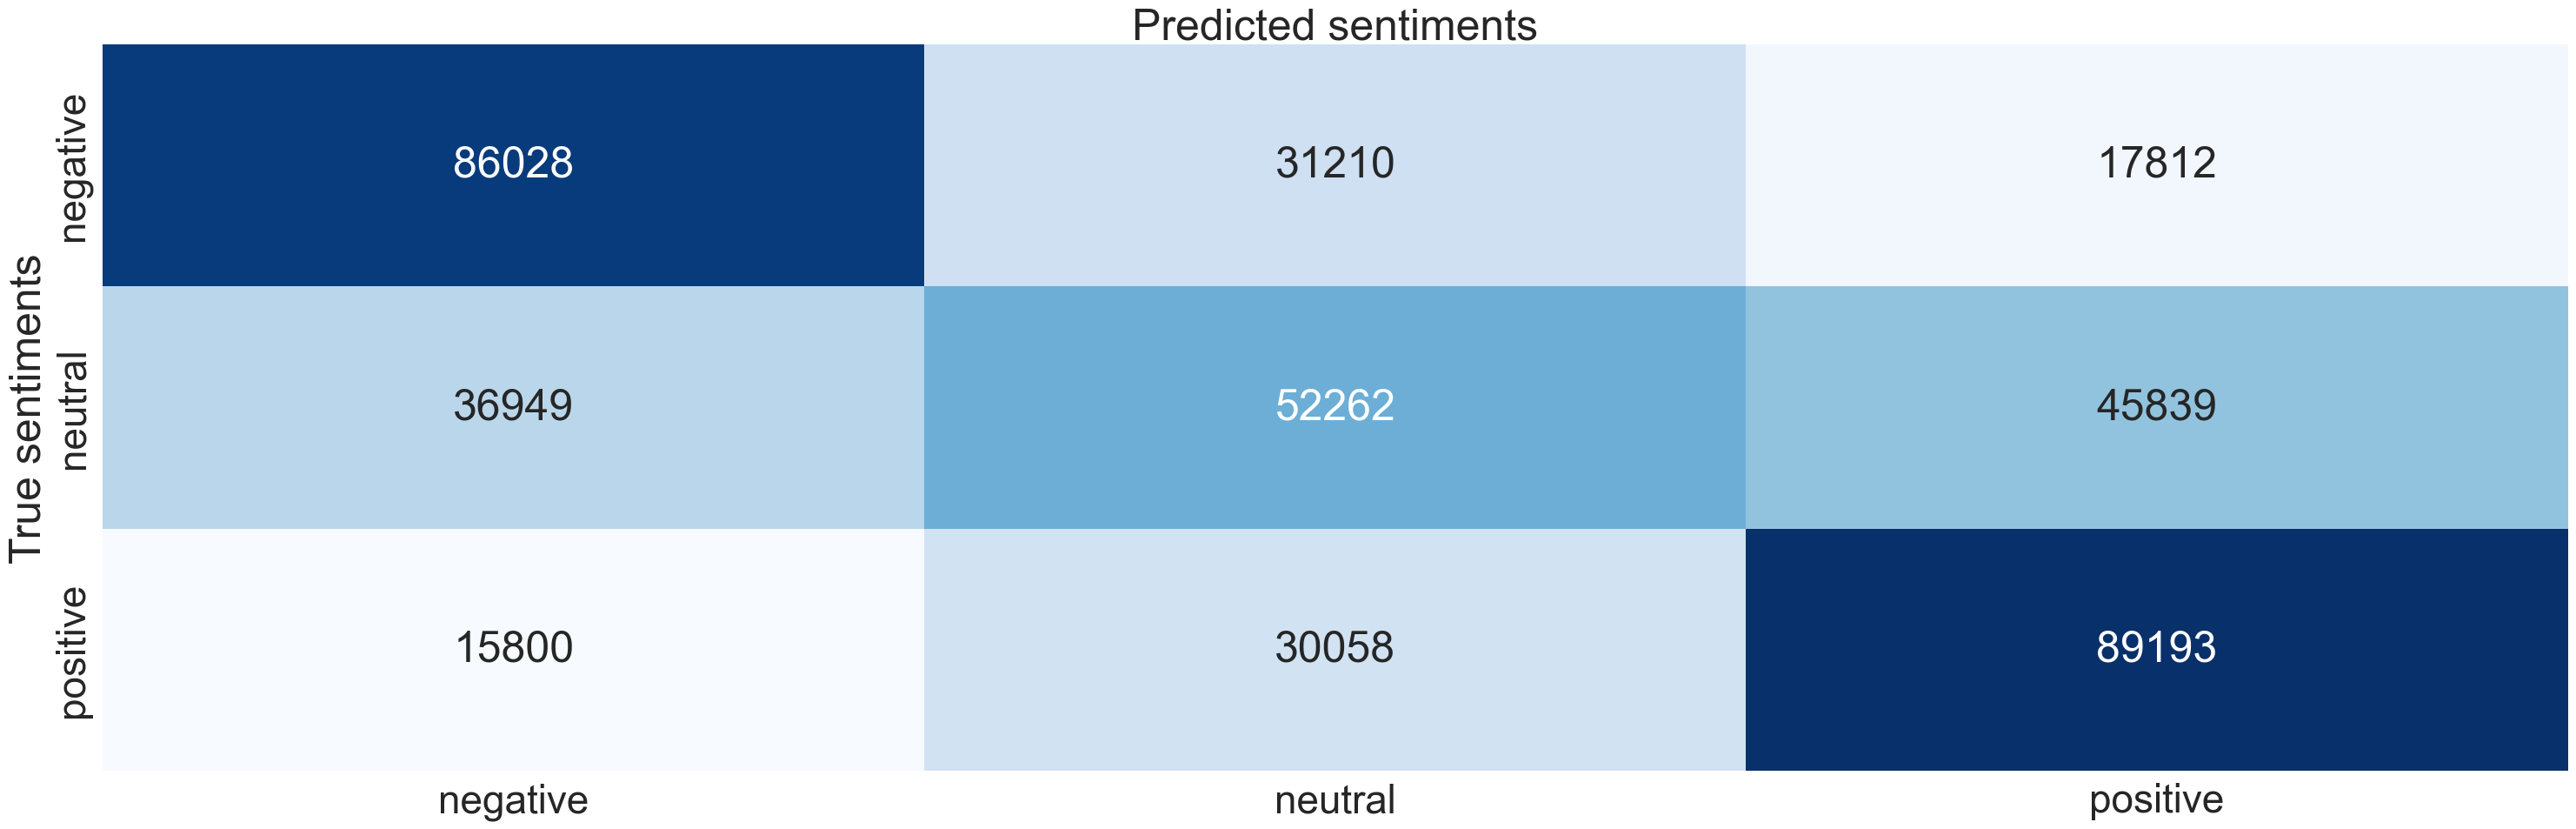

In [67]:
cnf_matrix(y_test,y_hat)


### Clustering - Reviews
###### Grouping by reviews into 5 clusters

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(full_df['Tokenized'].astype("U"))

In [69]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [70]:
full_df['cluster'] = model.labels_

In [71]:
clusters = full_df.groupby('cluster')

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------Reviews------------')
    print(full_df[full_df.cluster==i].Note.values[:3])
    print('-------------------------------')

Cluster centroids: 

Cluster 0:
 wine
 great
 nice
 sweet
 taste
 price
 light
 like
 fruit
 best
 drink
 easy
 finish
 red
 little
------------Reviews------------
['A family favorite. '
 'Bright, effervescent, pear- great summer porch wine'
 'Very nice, smooth and full flavored. Blackberry noted that open up as it breathes. Great value too!']
-------------------------------
Cluster 1:
 smooth
 fruity
 sweet
 nice
 light
 great
 finish
 easy
 wine
 delicious
 taste
 bodied
 bold
 drink
 rich
------------Reviews------------
['Very smooth. Very drinkable' 'smooth, very drinkable'
 'Big fan, goes down super smooth ']
-------------------------------
Cluster 2:
 dry
 fruity
 good
 smooth
 finish
 sweet
 nice
 light
 value
 great
 wine
 little
 taste
 fruit
 bold
------------Reviews------------
['Light fruit, dry and acidic. Very good with food with a spicy finish '
 'Good value. Dry to start very nice!'
 'Sweet, dry surprise, very interesting ']
-------------------------------
Cluster 3:
 o

C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
#import seaborn as sns
#for c in range(5):
#  sns.countplot(x='Sentiment', data=full_df[full_df['cluster']==c]).set(title=c)
#  plt.show()
#sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

In [73]:

"""
full_df[full_df.cluster==0].groupby(by="Sentiment").count()
full_df[full_df.cluster==1].groupby(by="Sentiment").count()
full_df[full_df.cluster==2].groupby(by="Sentiment").count()
full_df[full_df.cluster==3].groupby(by="Sentiment").count()
full_df[full_df.cluster==4].groupby(by="Sentiment").count()
"""

'\nfull_df[full_df.cluster==0].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==1].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==2].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==3].groupby(by="Sentiment").count()\nfull_df[full_df.cluster==4].groupby(by="Sentiment").count()\n'

### Analysis of reviews about price
###### Only sentences containing "price" are now considered
###### Empty entries are dropped

In [74]:
_X_test['PriceNote'] = _X_test.Note.apply(lambda f: data_processing.pick_only_key_sentence(f,'price'))
_X_test = _X_test[_X_test.astype(str)['PriceNote'] != '[]']

In [75]:
_X_test['PriceNote'] = _X_test.Note.apply(lambda f: data_processing.clean(f))
_X_test['PriceNote'] = _X_test.Note.apply(lambda f: data_processing.tokenize(f))

C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file C:\Users\andre\PycharmProjects\DM2583-project\Dataset\__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  no_html = BeautifulSoup(text).get_text()
C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


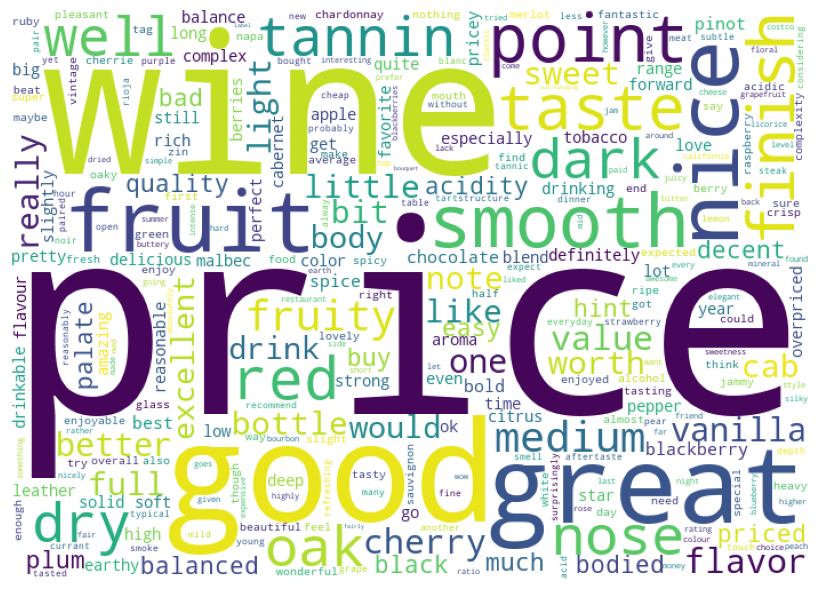

In [76]:
plot_wordcloud(_X_test.Cleaned)

#### Prediction on "PriceNote" test set

In [77]:
y_hat_ = MNB.predict(_X_test.PriceNote.values)

##### Evaluation

In [78]:
acc = np.sum(np.equal(_X_test.Sentiment.values, y_hat_)) / len(_X_test.Sentiment.values)
print("Accuracy: ", acc)


Accuracy:  0.5203175065540344


In [79]:
class_report(_X_test.Sentiment.values,y_hat_)

              precision    recall  f1-score   support

          -1       0.55      0.78      0.64     11881
           0       0.46      0.32      0.38      9779
           1       0.51      0.34      0.41      5804

    accuracy                           0.52     27464
   macro avg       0.51      0.48      0.47     27464
weighted avg       0.51      0.52      0.50     27464



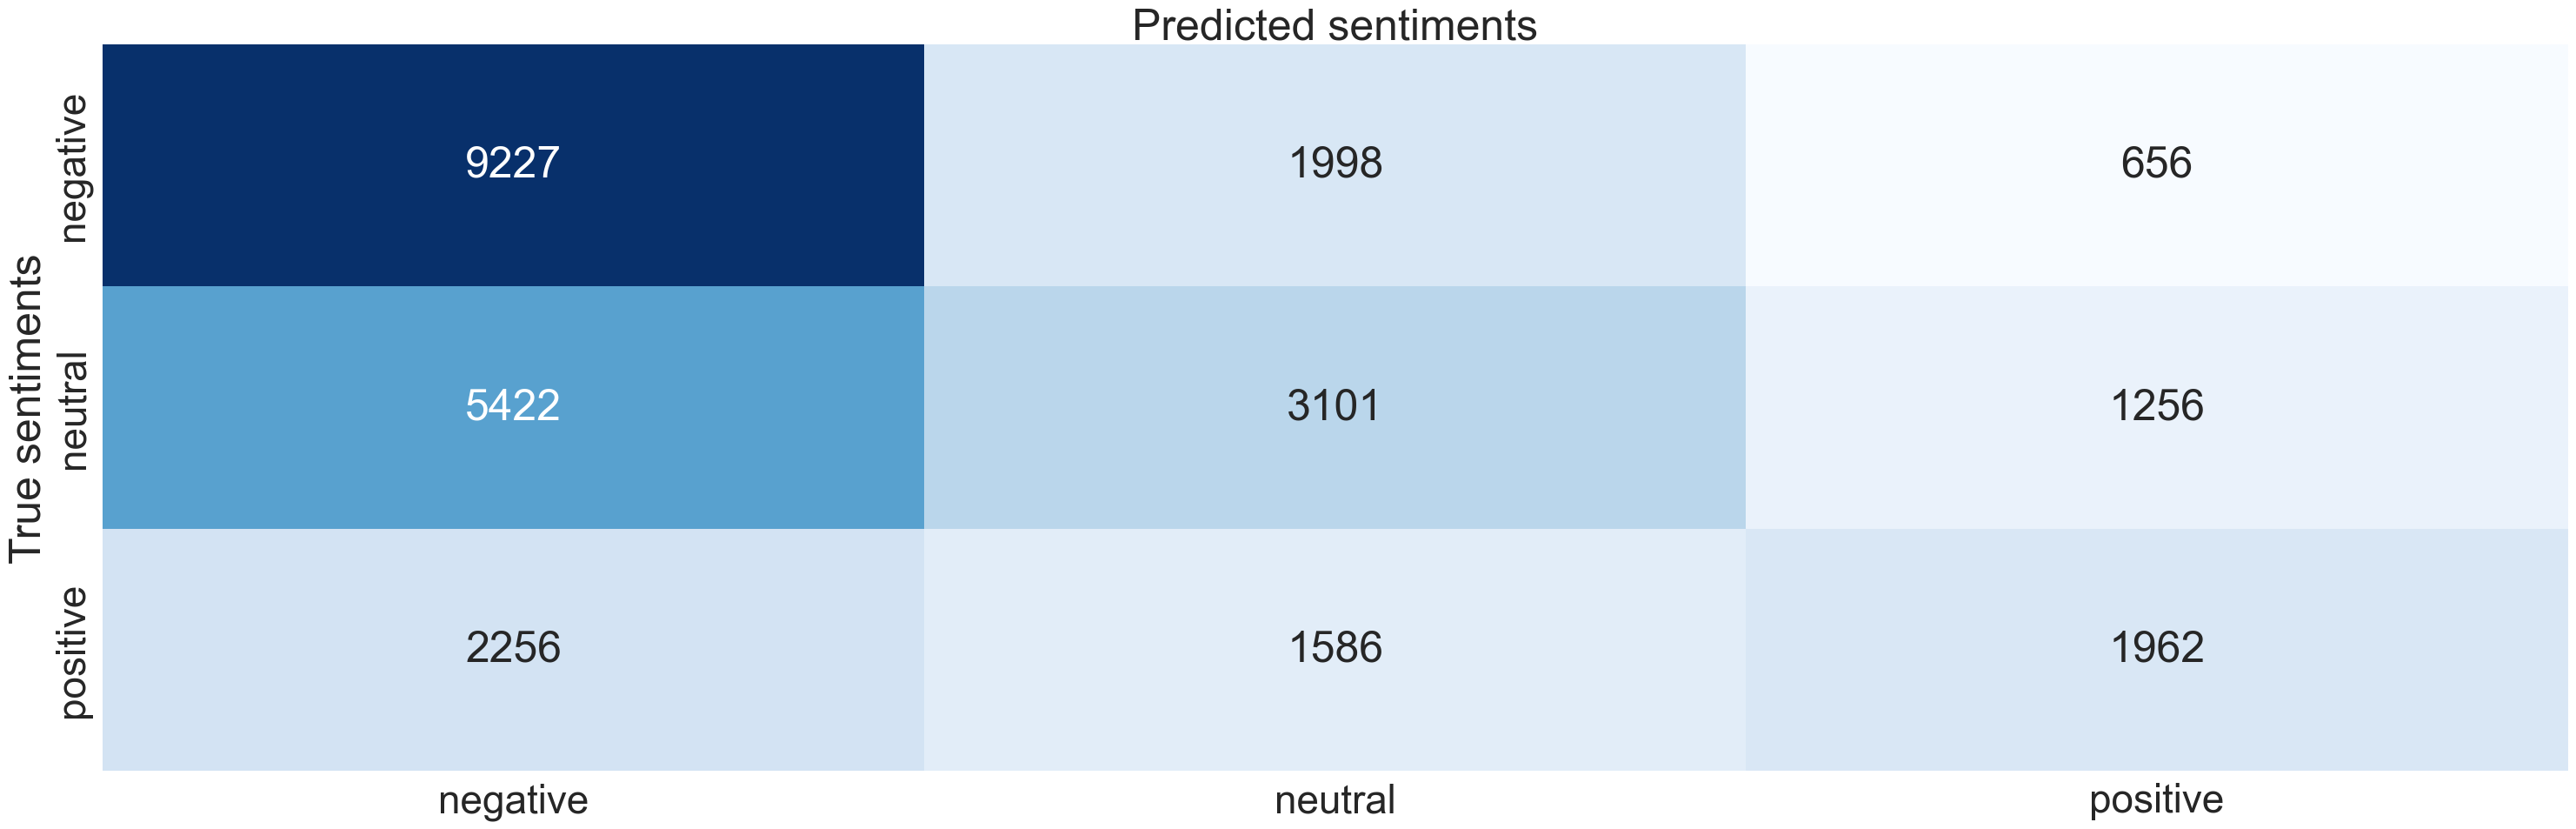

In [80]:
cnf_matrix(_X_test.Sentiment.values,y_hat_)


In [81]:
_X_test.groupby(by="Sentiment").count()


,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Winery,Rating,Country,Region,Price,Cleaned,Tokenized,int_Rating,cluster,PriceNote
Sentiment,,,,,,,,,,,,,,,,,
-1,11881,11711,11881,11881,11881,11881,11881,11881,11881,11881,11872,11881,11881,11881,11881,11881,11881
0,9779,9536,9779,9779,9779,9779,9779,9779,9779,9779,9773,9779,9779,9779,9779,9779,9779
1,5804,5609,5804,5804,5804,5804,5804,5804,5804,5804,5800,5804,5804,5804,5804,5804,5804


#### Clustering - User Bio

In [82]:
df = users_df
df['Bio'].replace('', np.nan, inplace=True)
df.dropna(subset=['Bio'], inplace=True)
df

,User,Bio,UserCountry,cluster
0,hellar.n,An arborist who just loves wine and pairing it...,estonia,0
1,martijn-kra,"Life is like wine, some are better at younger ...",netherlands,1
2,robin.fen,"Wine enthusiast, always on the lookout for new...",netherlands,0
5,joost_hee,Life is too short to drink bad \n(Voorkeur voo...,netherlands,0
6,mori.afshar,Wine is constant proof that God loves us and l...,netherlands,0
...,...,...,...,...
49257,martin_robe,Wset Level 1,united-kingdom,2
49260,bruces1,AM coffee snob PM wine snob,united-states,0
49271,tacyk,"Working class mom, tasting wines $10-$18 and t...",united-states,6
49284,leonardo-biag,:-),italy,0


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['Bio'].astype("U"))

In [84]:
k = 8
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_init=1)

In [85]:
df['cluster'] = model.labels_
clusters = df.groupby('cluster')


In [86]:
df.groupby(by='UserCountry').count()
users_reviews_count = df.pivot_table(columns=['UserCountry'], aggfunc='size')
users_reviews_count = users_reviews_count.sort_values(ascending=False)
users_reviews_count.index[:24]

Index(['united-states', 'united-kingdom', 'canada', 'netherlands',
       'south-africa', 'australia', 'denmark', 'brazil', 'norway', 'germany',
       'sweden', 'belgium', 'finland', 'poland', 'ireland', 'spain',
       'switzerland', 'russia', 'italy', 'japan', 'singapore', 'france',
       'portugal', 'new-zealand'],
      dtype='object', name='UserCountry')

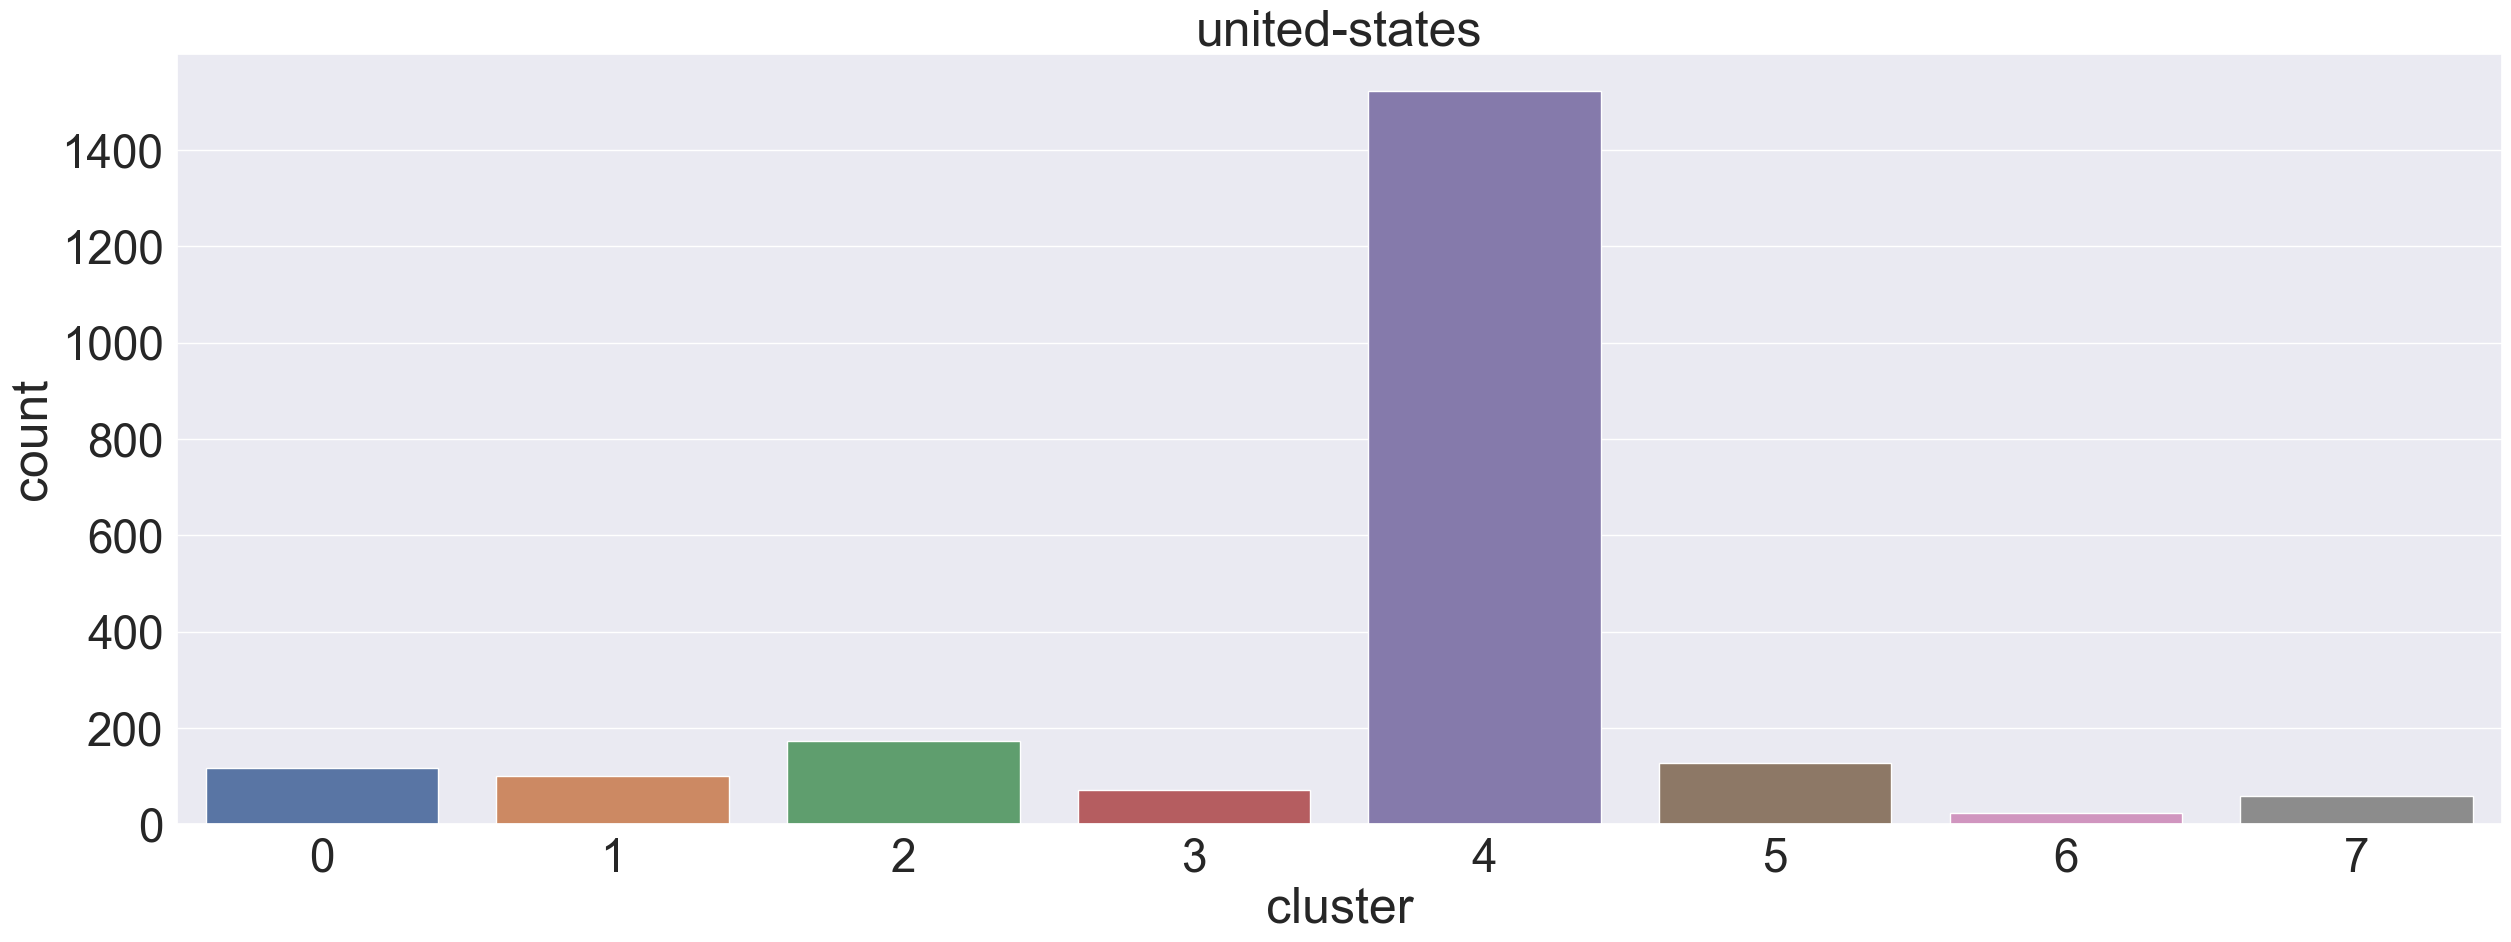

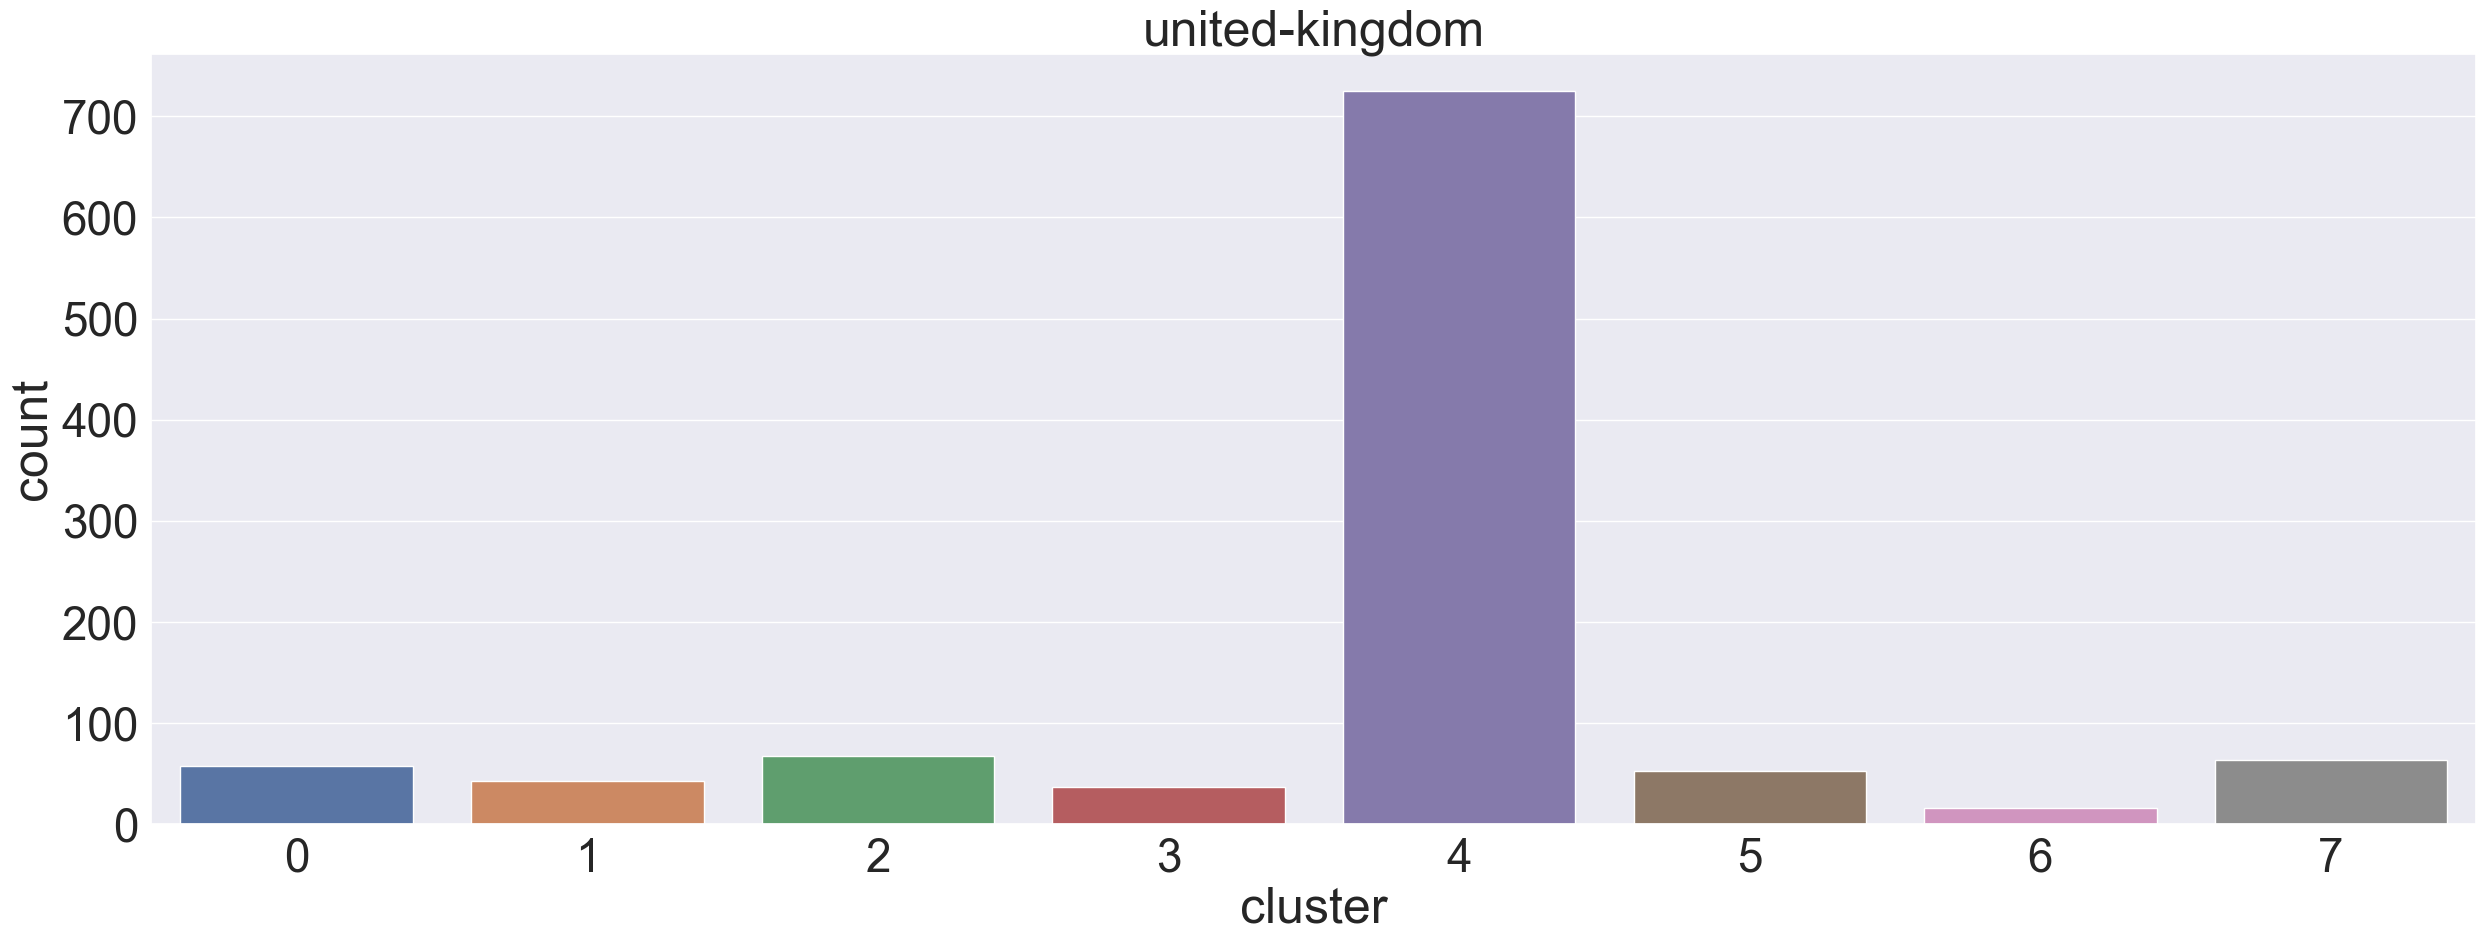

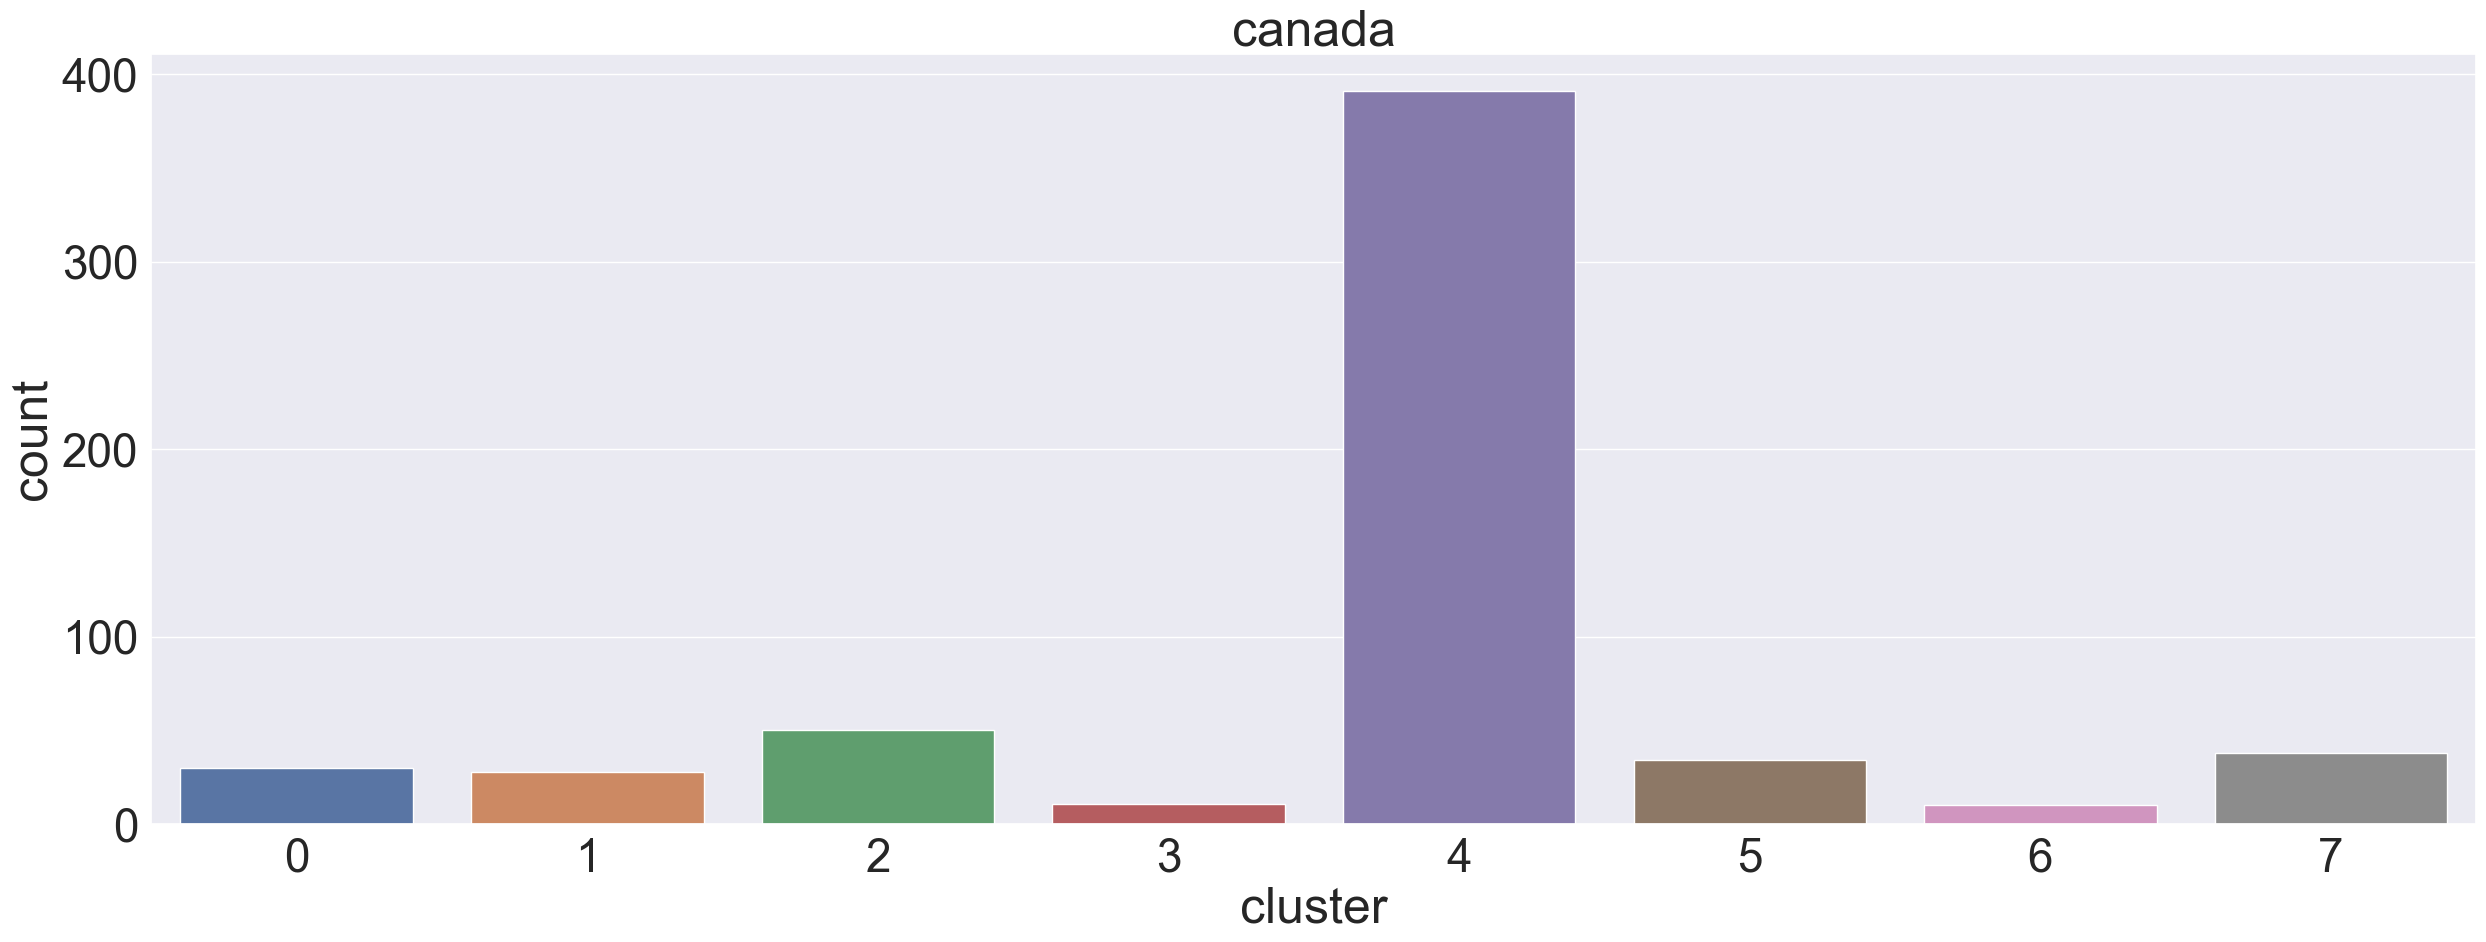

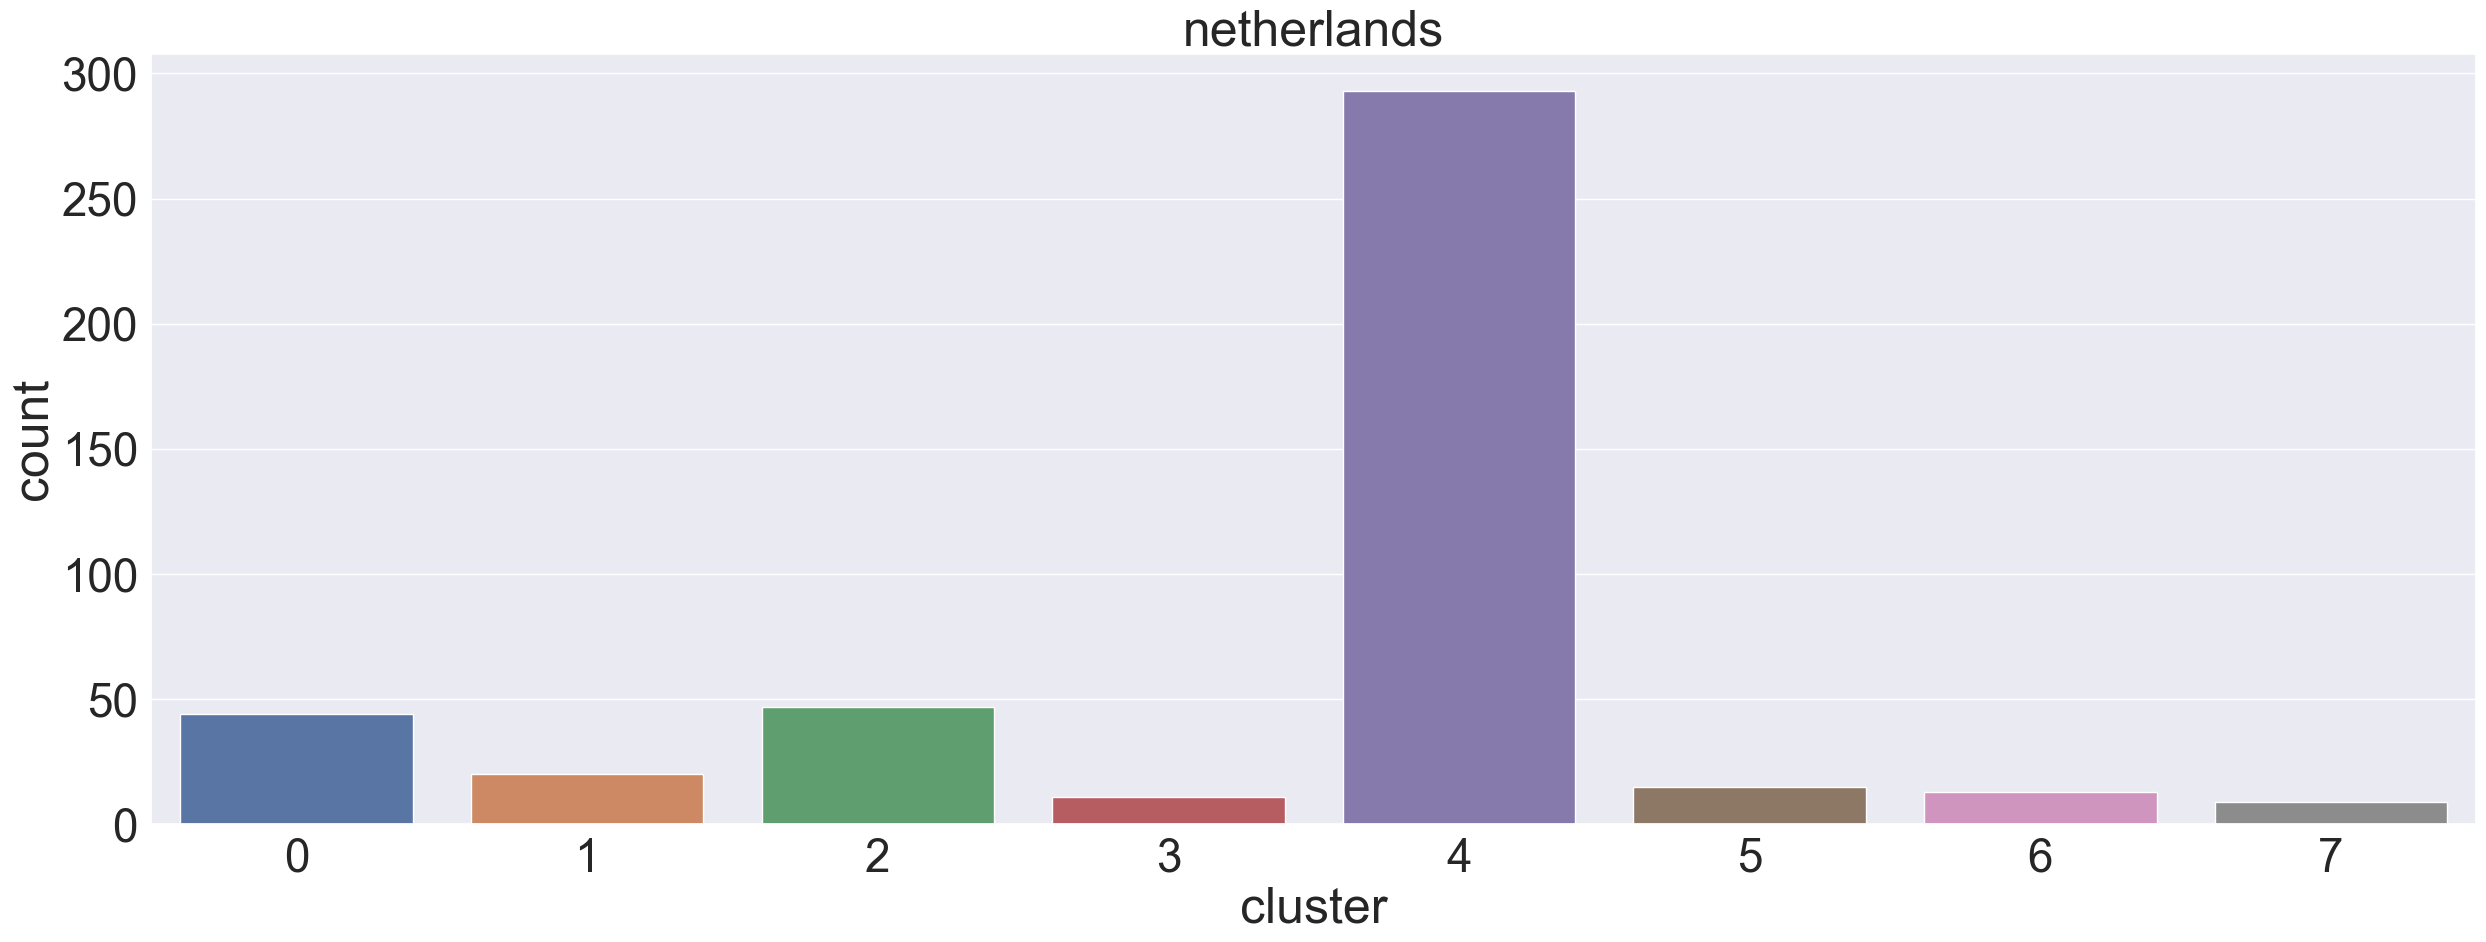

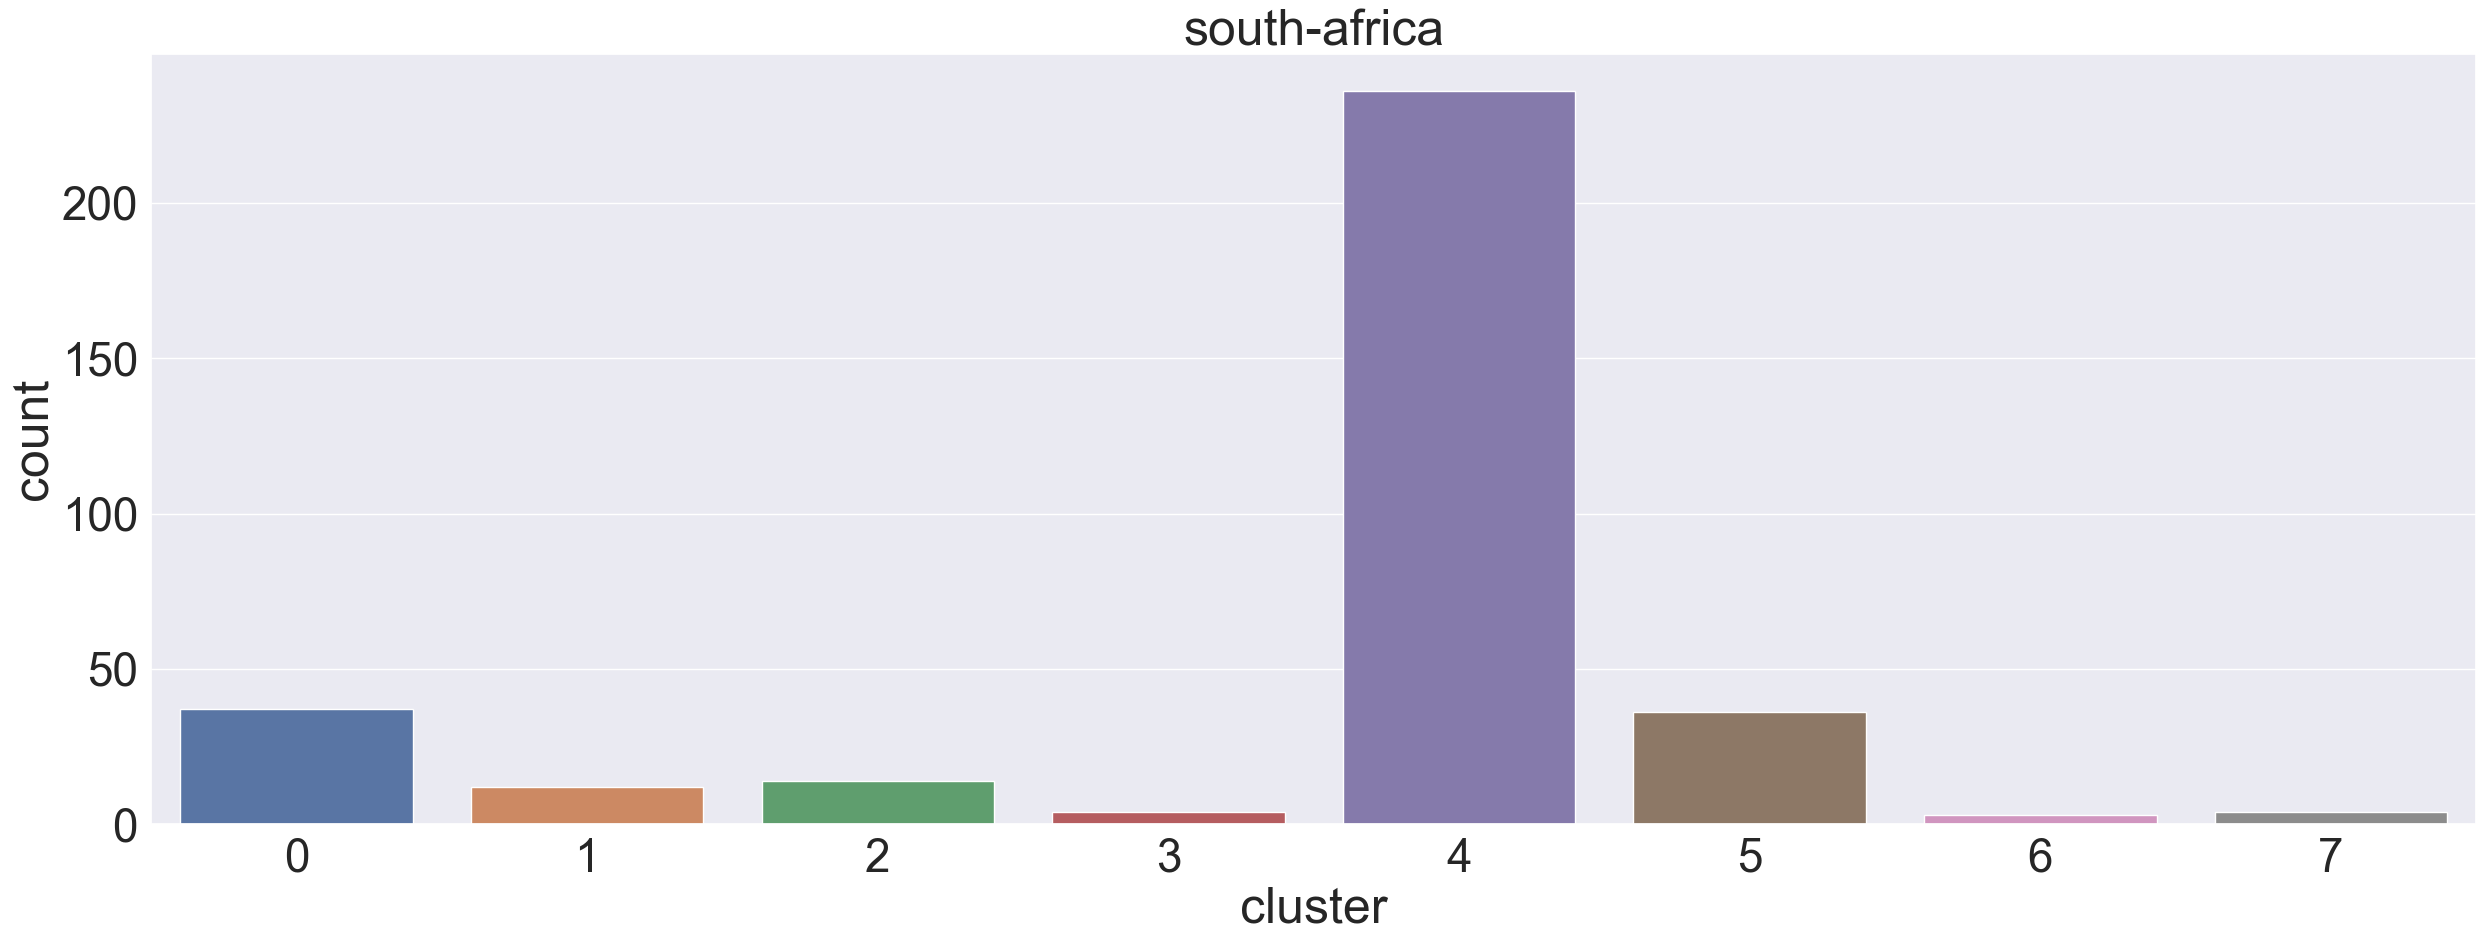

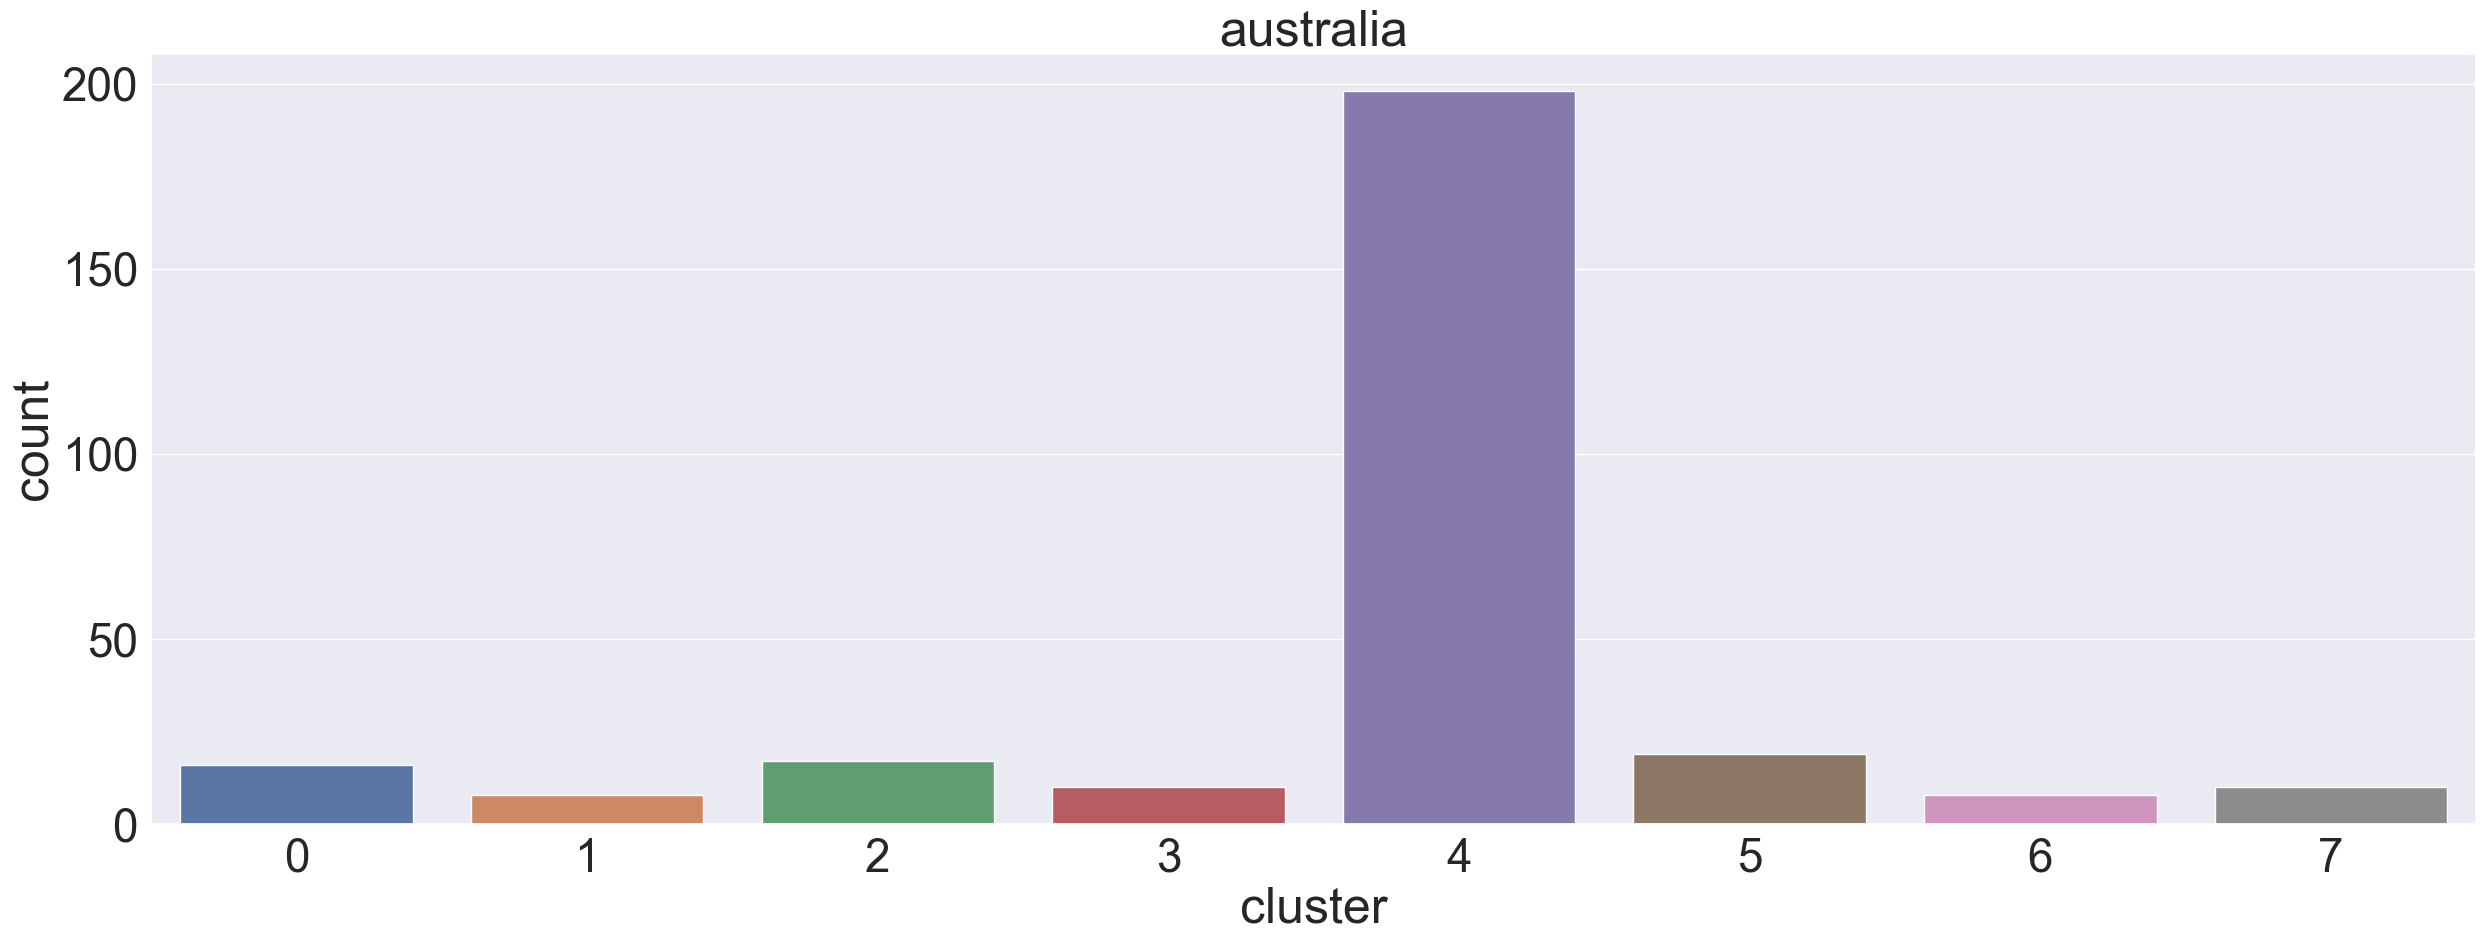

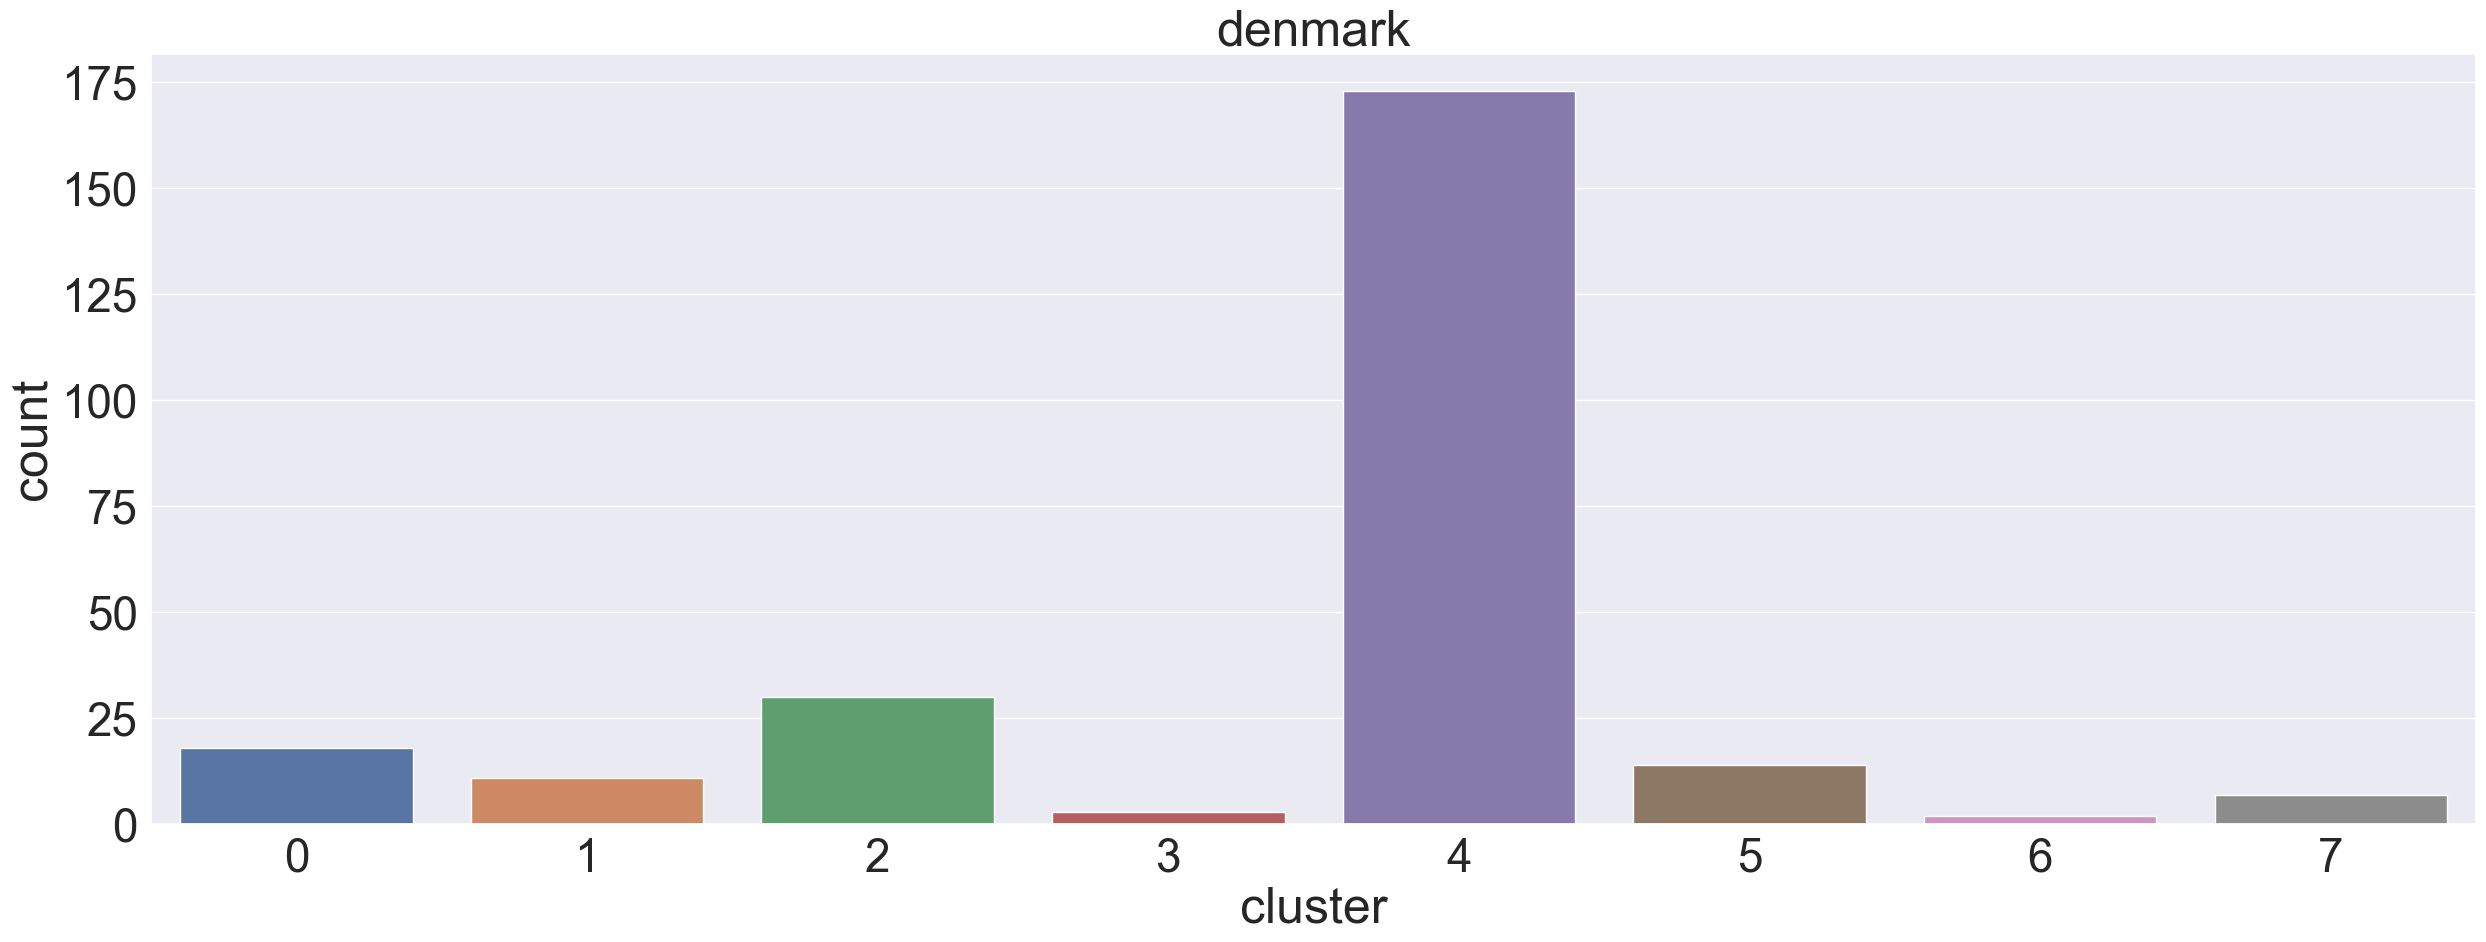

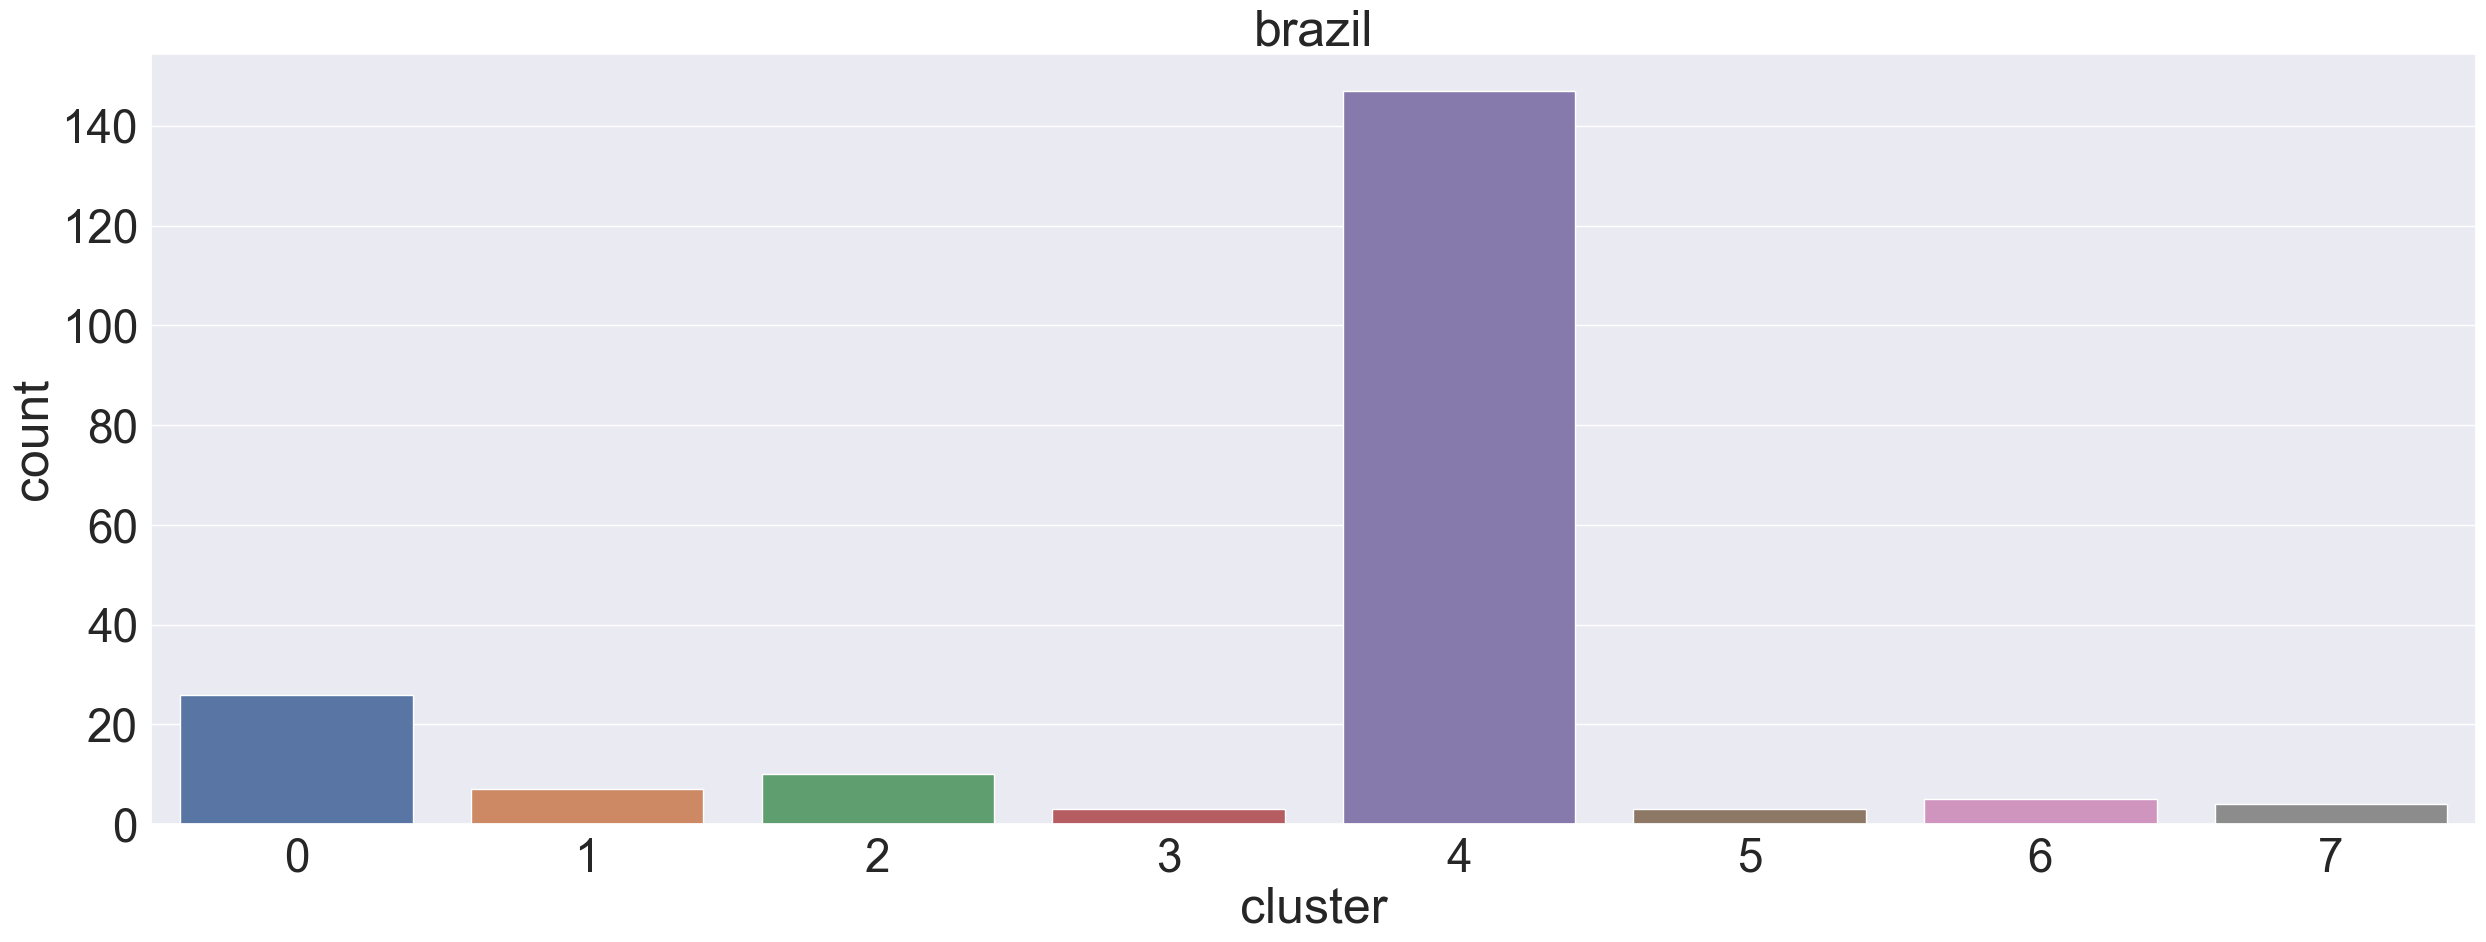

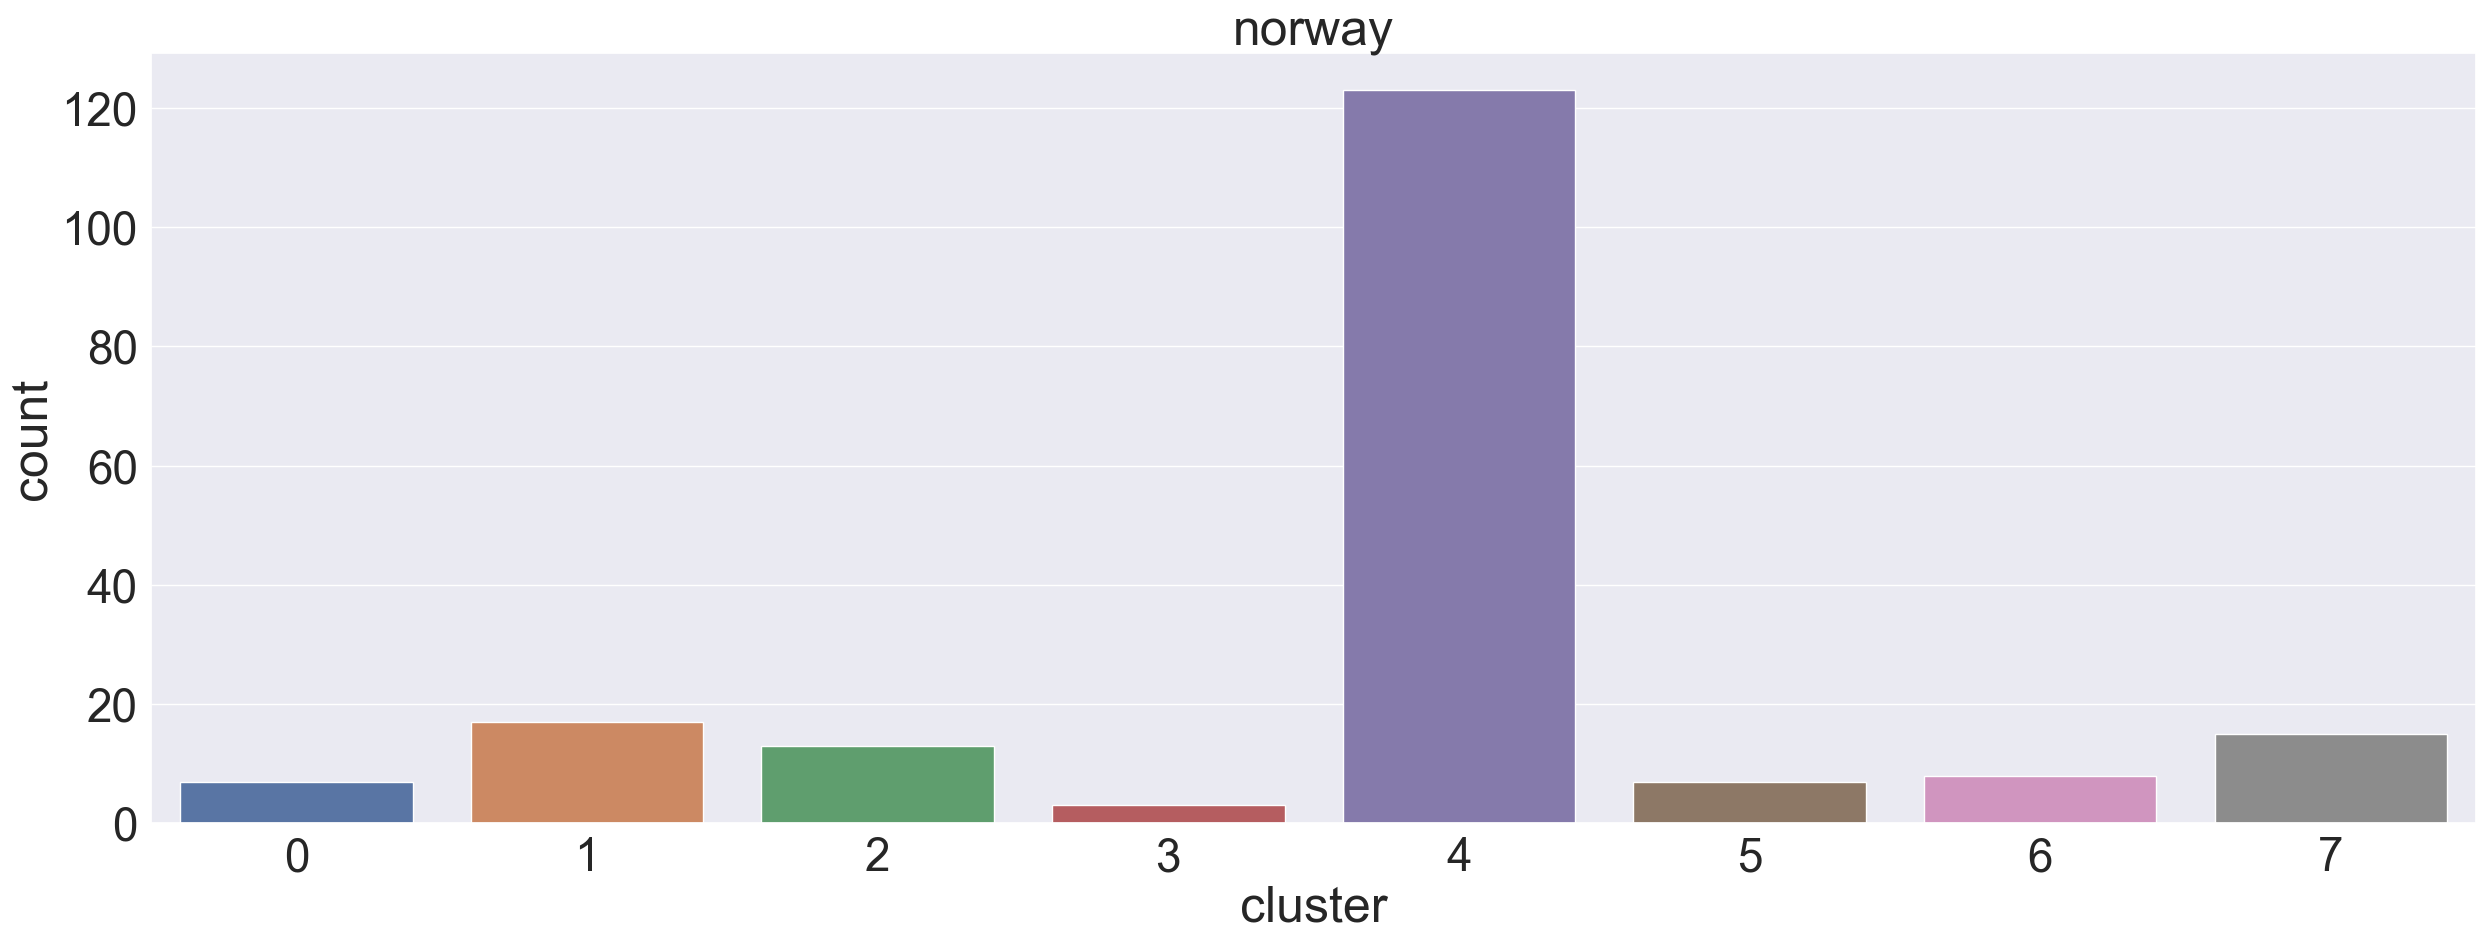

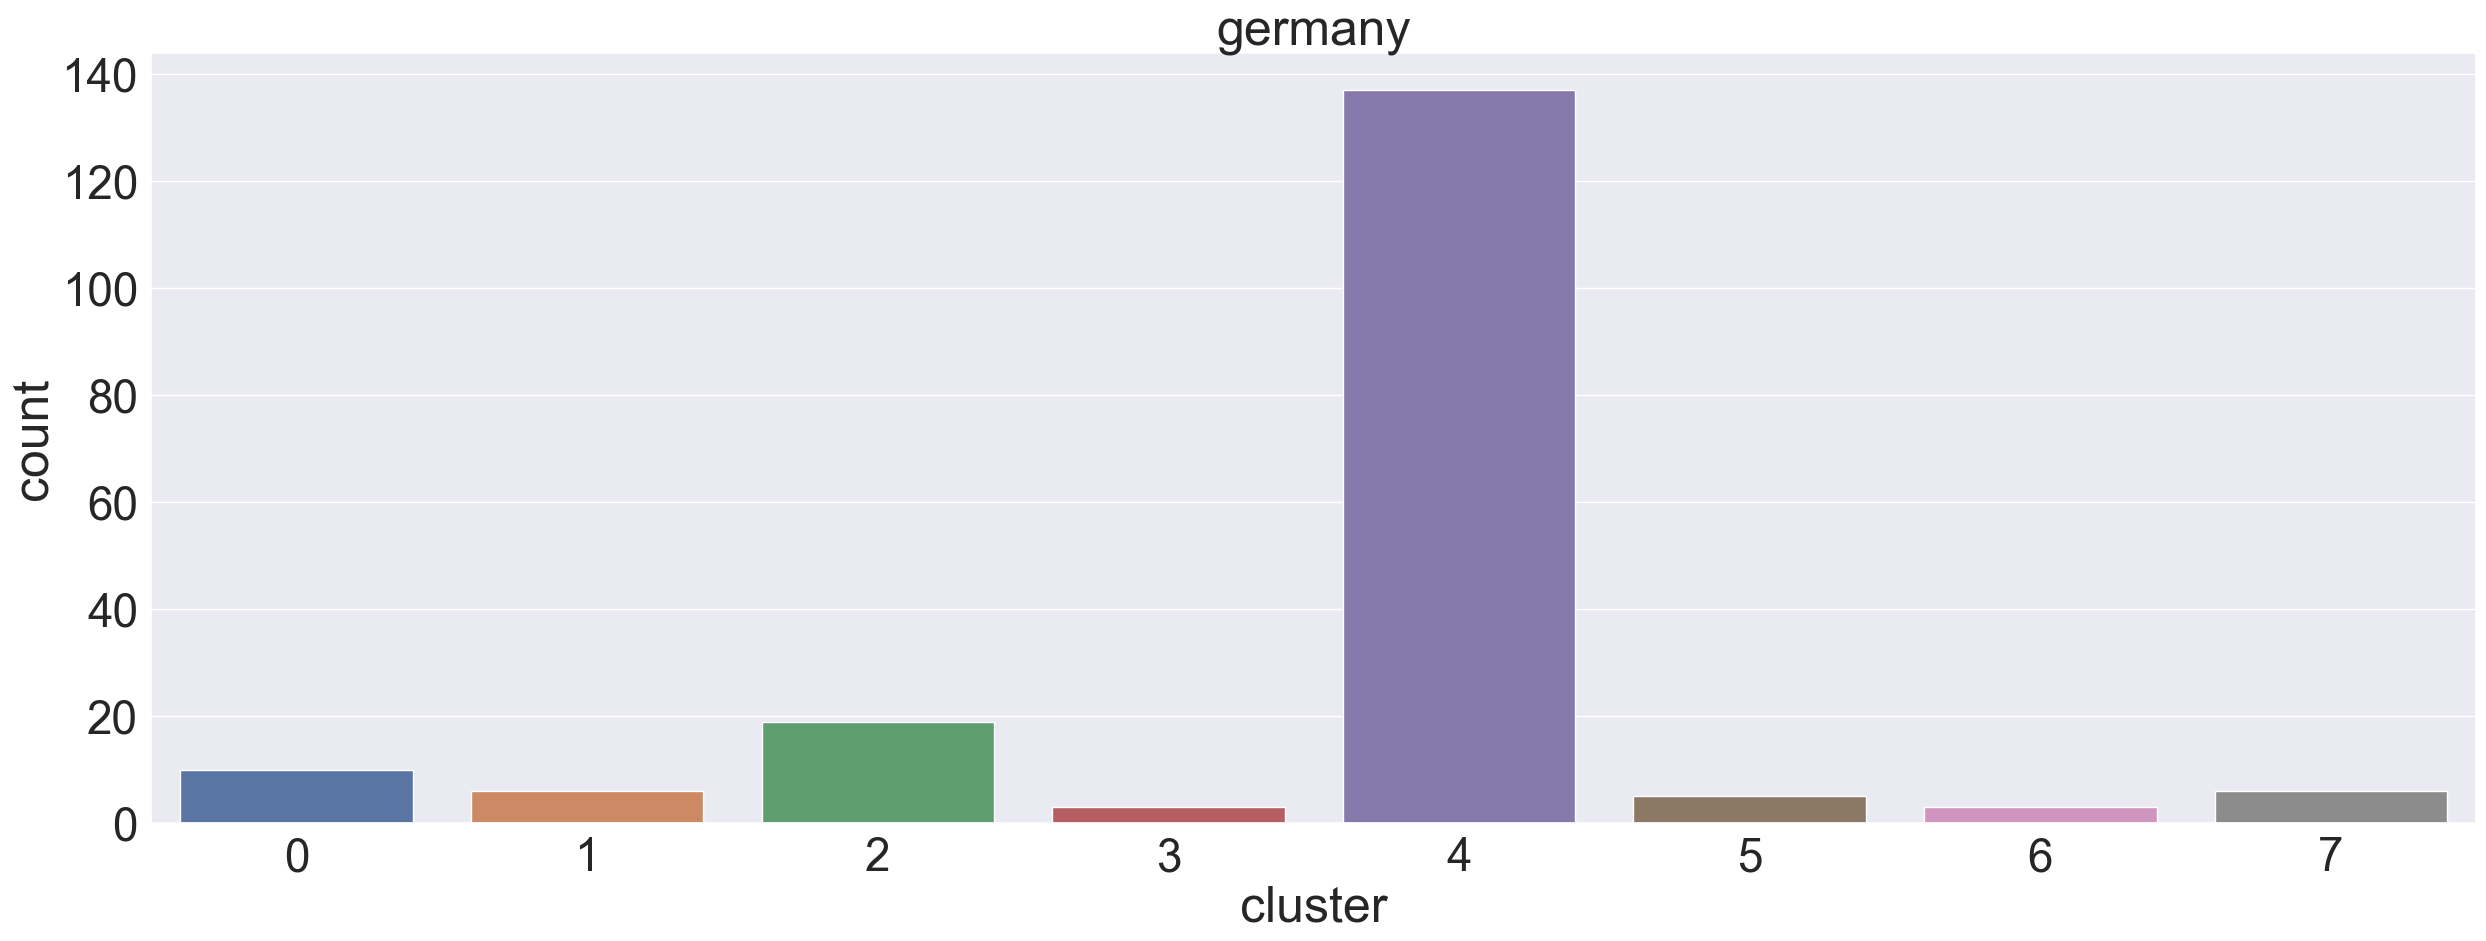

In [87]:
for c in users_reviews_count.index[:10]:
  sns.countplot(x='cluster', data=df[df['UserCountry']==c]).set(title=c)
  plt.show()
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 2)

In [88]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')
    print(df[df.cluster == i].Bio.values[0])
    print('------------')

Cluster centroids: 

Cluster 0:
 wine
 lover
 life
 short
 drink
 bad
 like
 food
 drinker
 good
------------
Life is great, wine is a part of that.
------------
Cluster 1:
 enthusiast
 wine
 amateur
 food
 wset
 lover
 certified
 just
 world
 time
------------
Just wine enthusiast
------------
Cluster 2:
 wines
 drink
 good
 wine
 great
 red
 italian
 love
 best
 lover
------------
Never drink the same wine, there are so many different wines. Try something different!
------------
Cluster 3:
 new
 world
 wine
 wines
 love
 trying
 try
 lover
 old
 discover
------------
Wine enthusiast, always on the lookout for new discoveries. WSET 3 certified.
------------
Cluster 4:
 wine
 good
 like
 drink
 just
 vino
 food
 sommelier
 life
 world
------------
An arborist who just loves wine and pairing it with food.
------------
Cluster 5:
 love
 wine
 good
 food
 red
 just
 reds
 life
 friends
 enjoy
------------
Love wine 🥂. Love Food 🍲. Love them together the most 🍷🍴.
------------
Cluster 6:
 i

C:\Users\andre\PycharmProjects\DM2583-project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


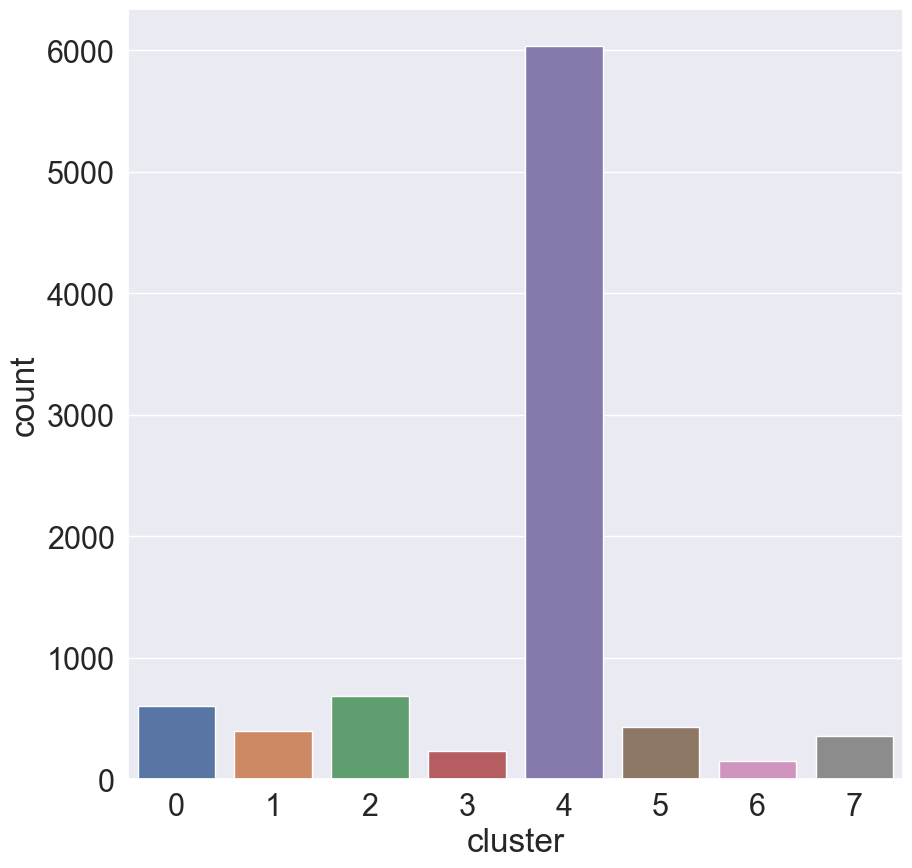

In [89]:
sns.countplot(x='cluster', data=df)
plt.show()

In [90]:
print(df[df.cluster == 6].Bio.values[:10
])

['Follow me on my winejourney. check my webblog and instagram thestoryofmywine'
 'Any Day, Every Day, is a Happy Day with Brunello. ©️🙂\nOn Instagram @Brunellodude'
 'SDEN3 + WSET3 certified - WSET4 student - Check out my wine stories on Instagram'
 'instagram @feed_me_wine '
 'Wine lover qualified to WSET Level 3. Instagram - @vinodaddio'
 'Wine for the Selective Palate; CSW & WSET3 Certified.  Instagram @sippingfinewine'
 'Wine is bottled poetry. –Robert Louis Stevenson\n\nInstagram: @vinofred'
 'WSET2 - instagram '
 'Follow my wine journey on Instagram   (🍾WineAdvocate🍷)'
 'Instagram -> 13kaoz']


###### Most of the users belong to the same cluster
###### In cluster 2 users are probably certified sommeliers (e.g. wset certifications)

